In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('covid_19_data.csv')


In [3]:
df.head()


SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [4]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [9]:
df3 = df2.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [10]:
df3

Country       Date Confirmed Deaths Recovered
0                          Azerbaijan 2020-02-28       1.0    0.0       0.0
1                     ('St. Martin',) 2020-03-10       2.0    0.0       0.0
2                         Afghanistan 2020-02-24       1.0    0.0       0.0
3                         Afghanistan 2020-02-25       1.0    0.0       0.0
4                         Afghanistan 2020-02-26       1.0    0.0       0.0
...                               ...        ...       ...    ...       ...
87276  occupied Palestinian territory 2020-03-12       0.0    0.0       0.0
87277  occupied Palestinian territory 2020-03-14       0.0    0.0       0.0
87278  occupied Palestinian territory 2020-03-15       0.0    0.0       0.0
87279  occupied Palestinian territory 2020-03-16       0.0    0.0       0.0
87280  occupied Palestinian territory 2020-03-17       0.0    0.0       0.0

[87281 rows x 5 columns]

In [11]:
df3

Country       Date Confirmed Deaths Recovered
0                          Azerbaijan 2020-02-28       1.0    0.0       0.0
1                     ('St. Martin',) 2020-03-10       2.0    0.0       0.0
2                         Afghanistan 2020-02-24       1.0    0.0       0.0
3                         Afghanistan 2020-02-25       1.0    0.0       0.0
4                         Afghanistan 2020-02-26       1.0    0.0       0.0
...                               ...        ...       ...    ...       ...
87276  occupied Palestinian territory 2020-03-12       0.0    0.0       0.0
87277  occupied Palestinian territory 2020-03-14       0.0    0.0       0.0
87278  occupied Palestinian territory 2020-03-15       0.0    0.0       0.0
87279  occupied Palestinian territory 2020-03-16       0.0    0.0       0.0
87280  occupied Palestinian territory 2020-03-17       0.0    0.0       0.0

[87281 rows x 5 columns]

In [12]:
countries = df3['Country'].unique()
len(countries)

229

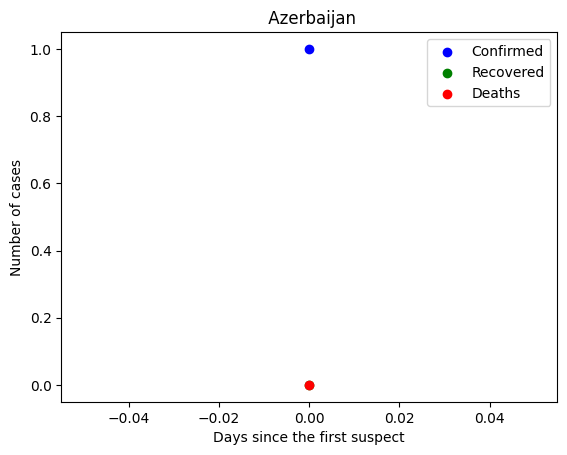

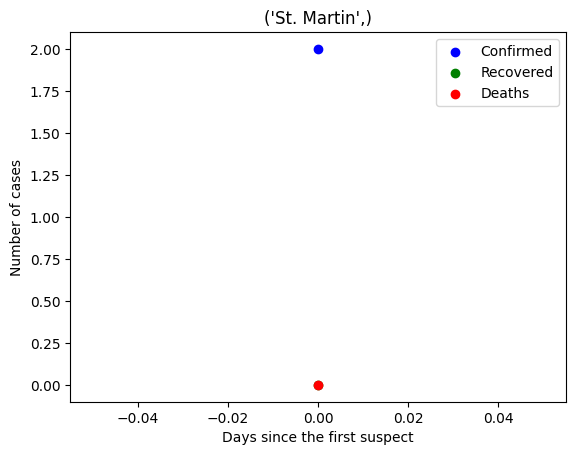

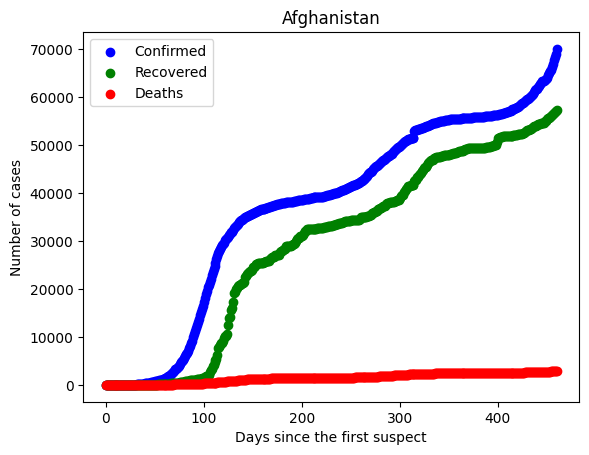

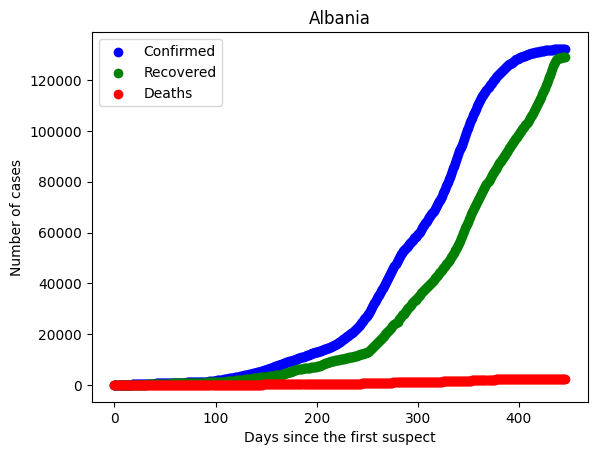

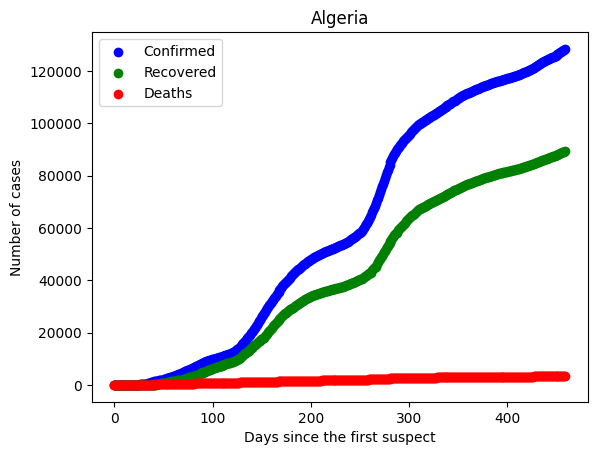

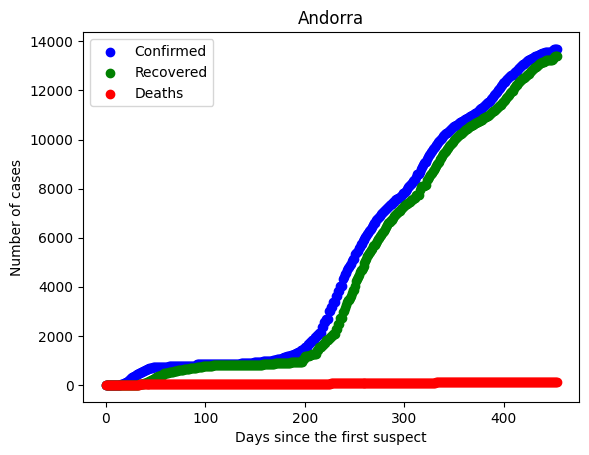

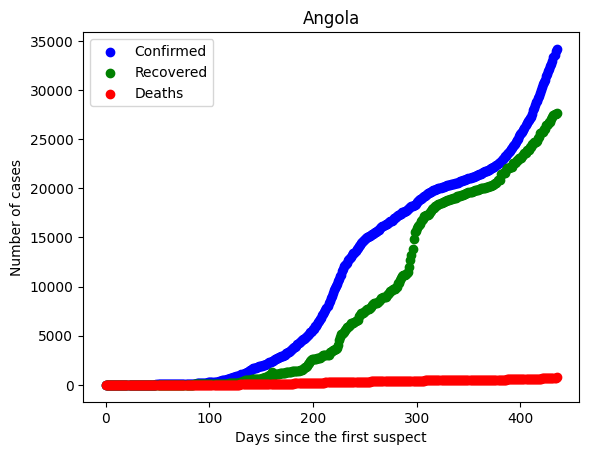

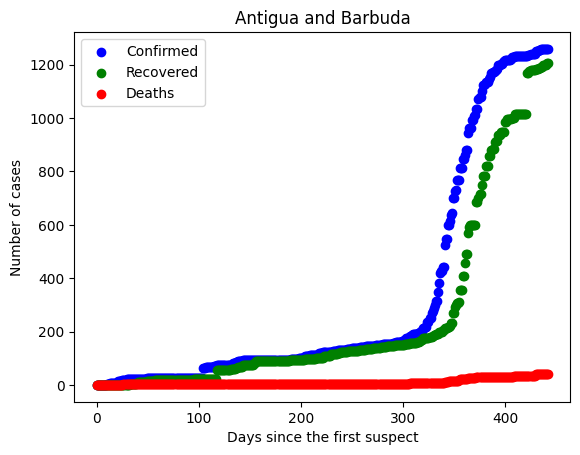

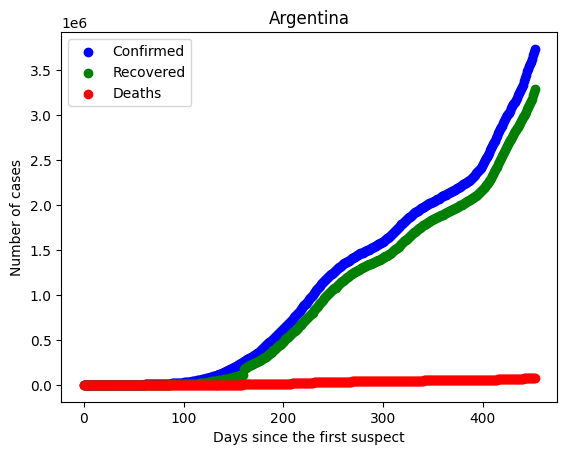

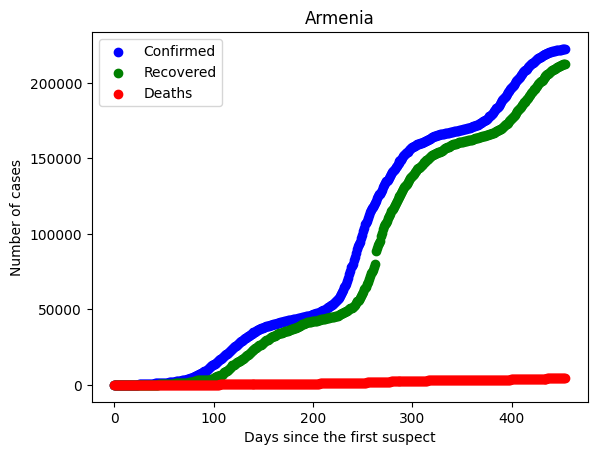

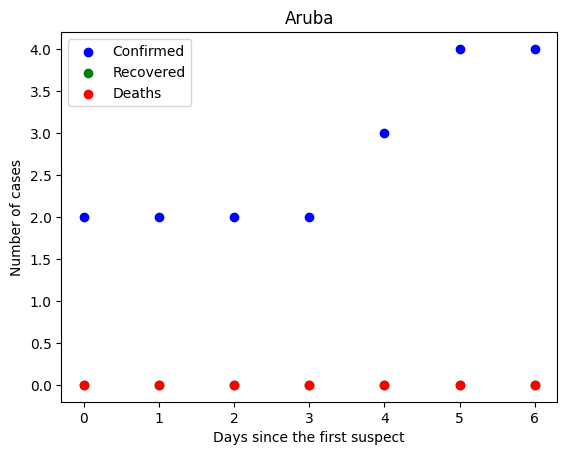

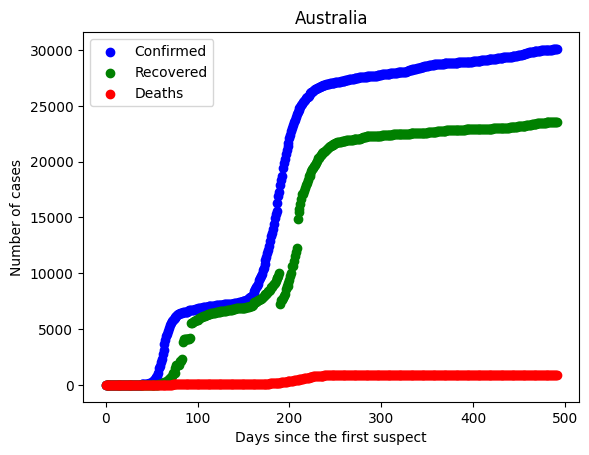

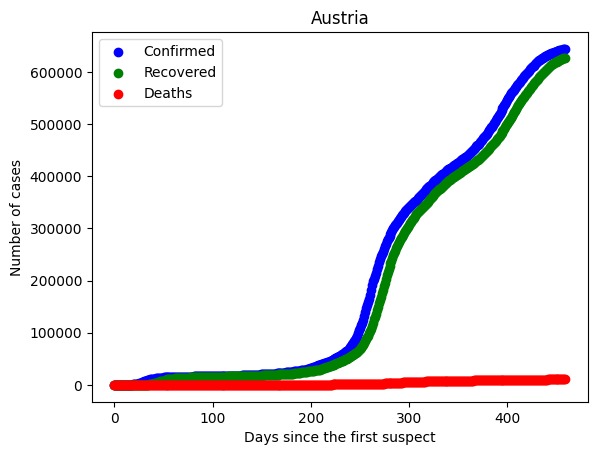

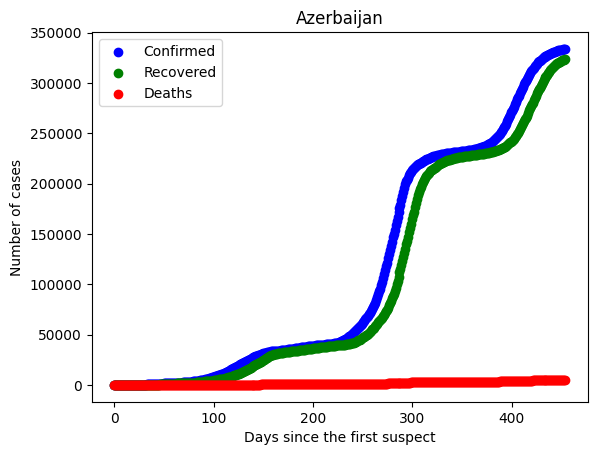

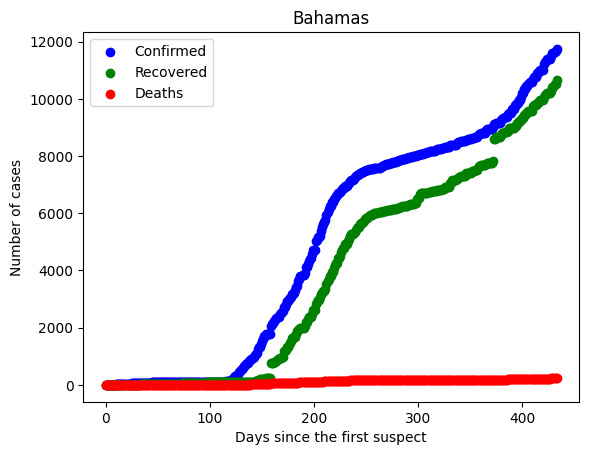

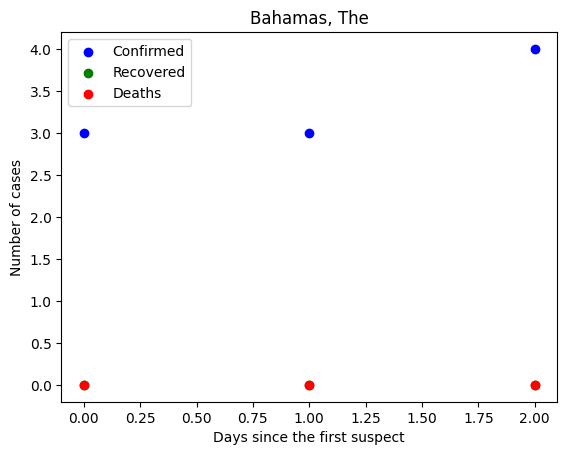

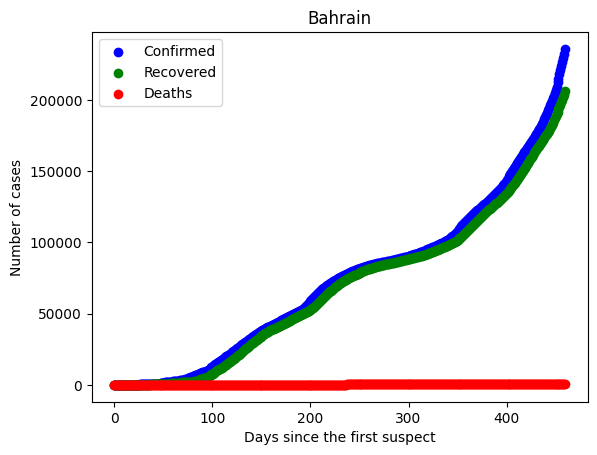

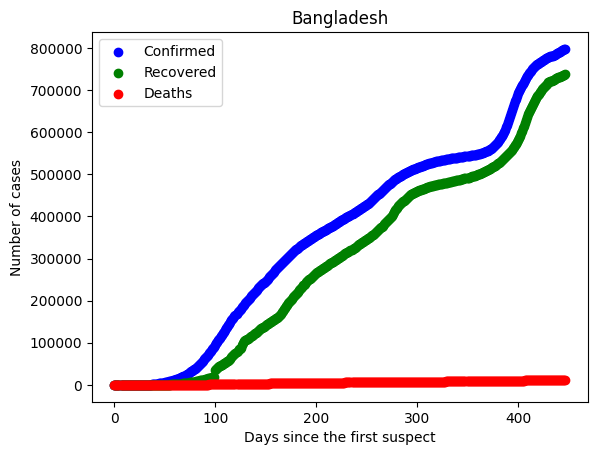

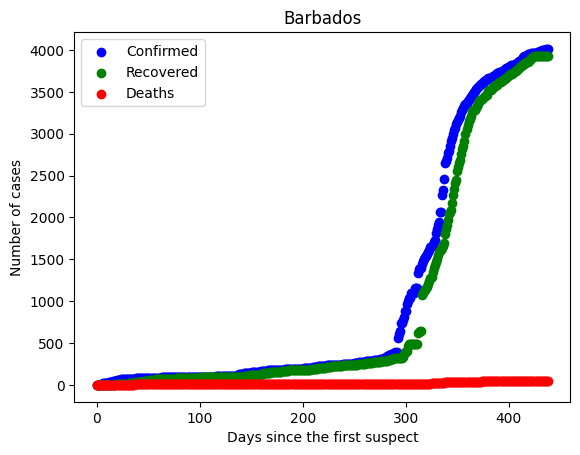

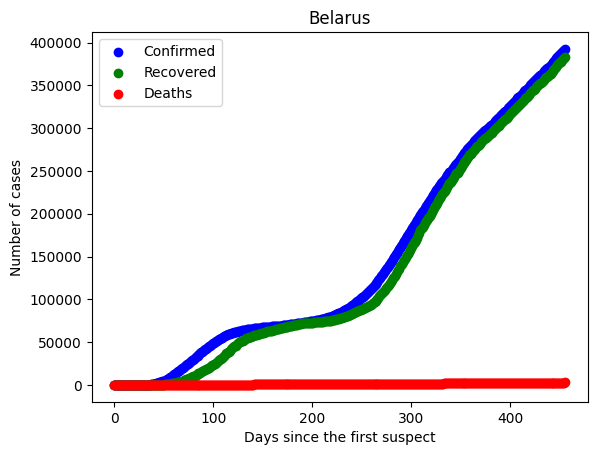

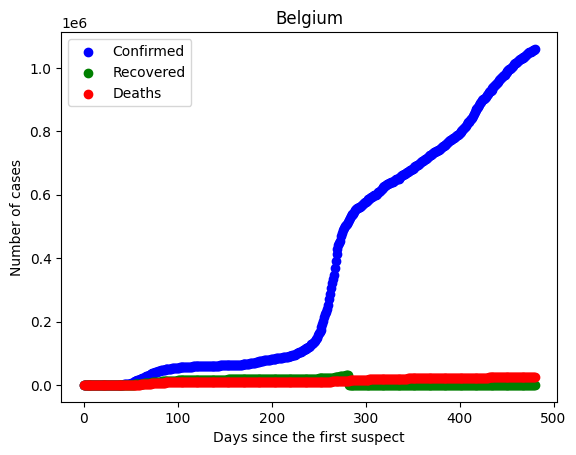

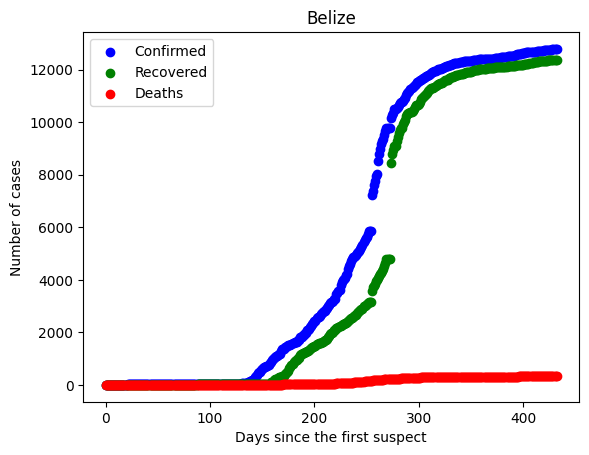

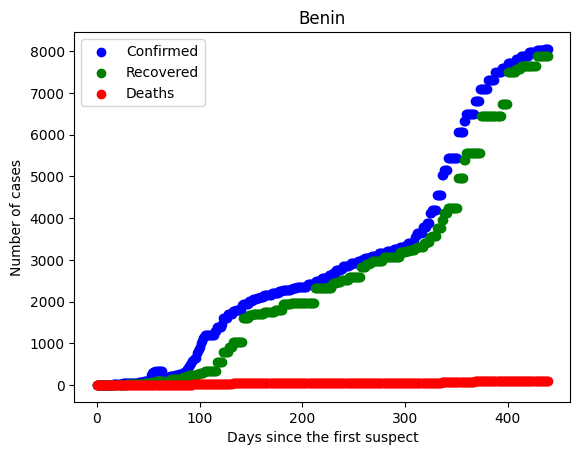

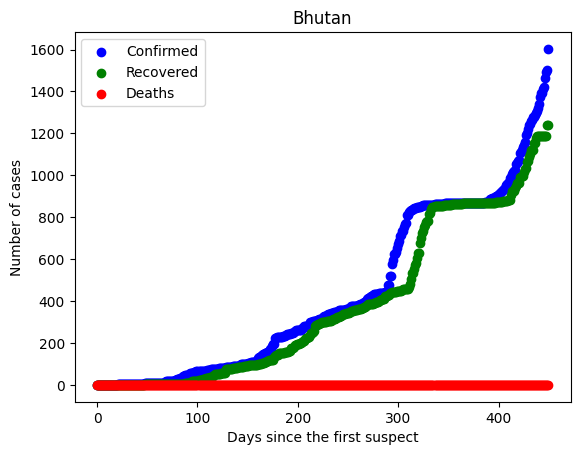

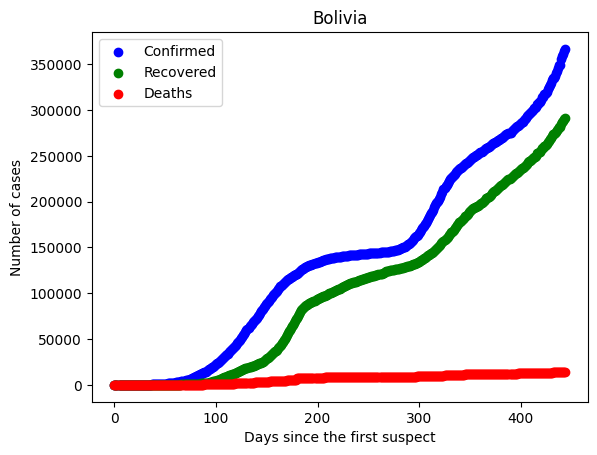

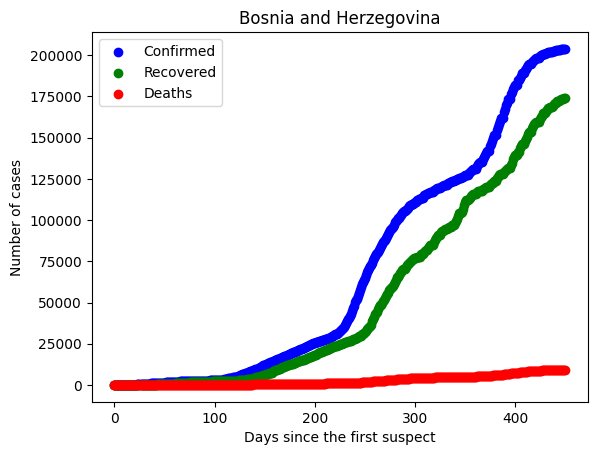

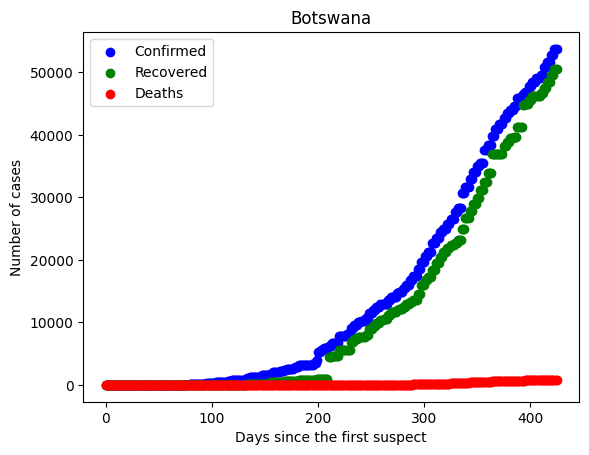

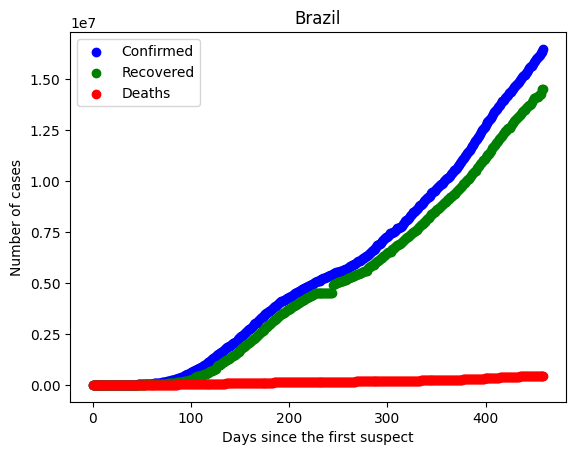

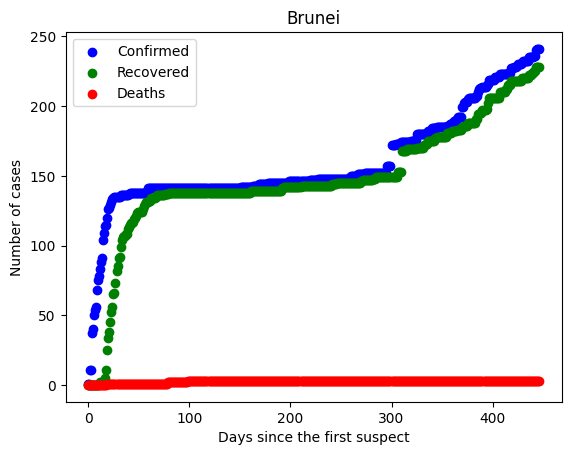

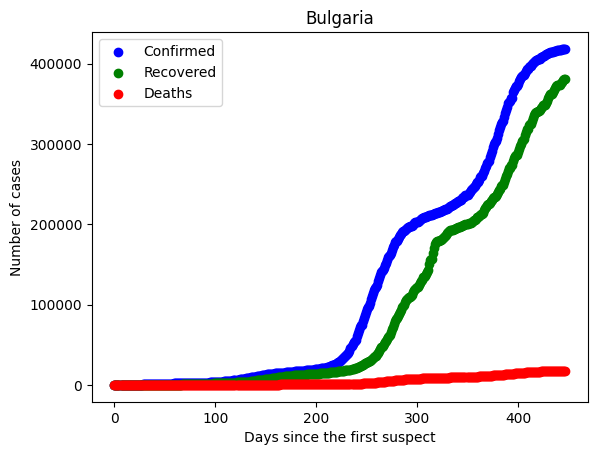

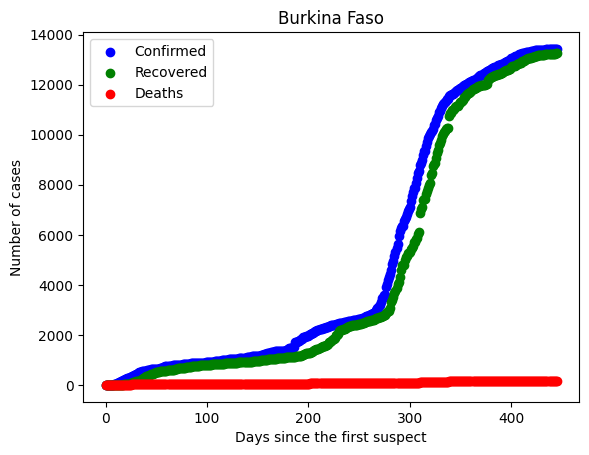

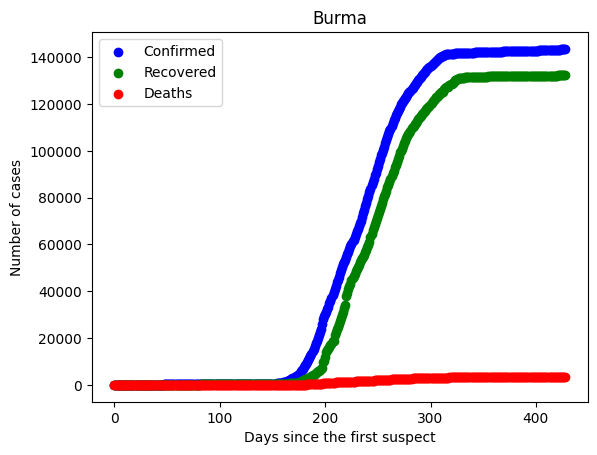

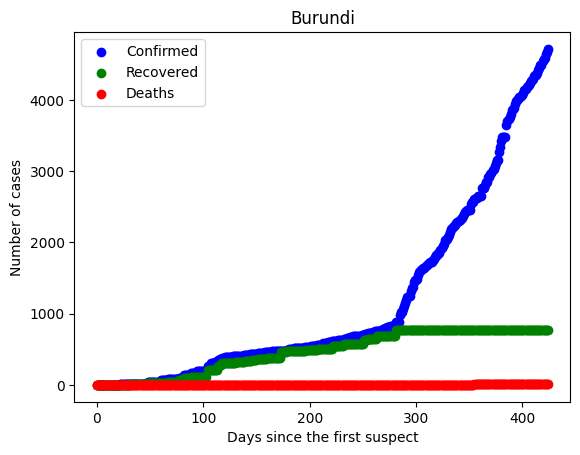

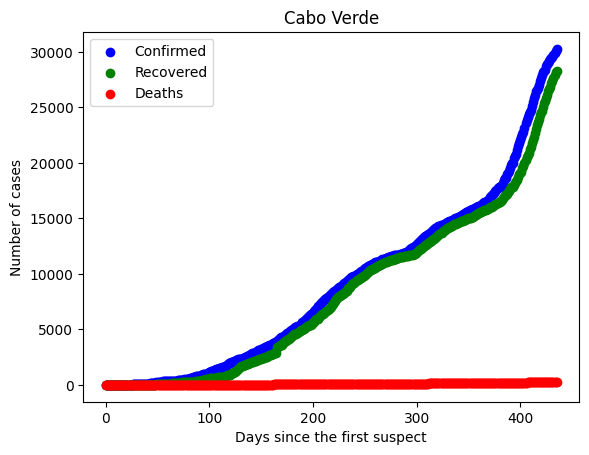

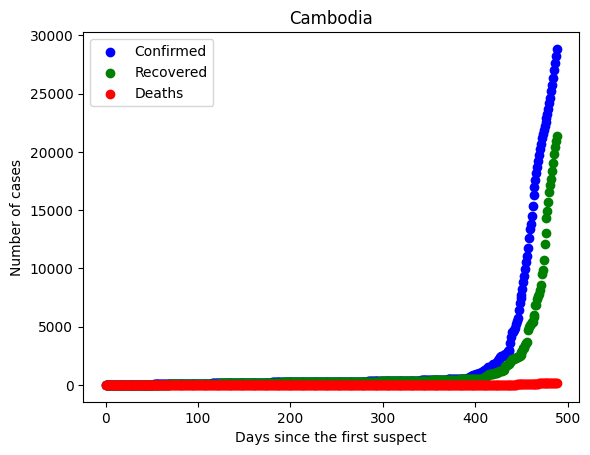

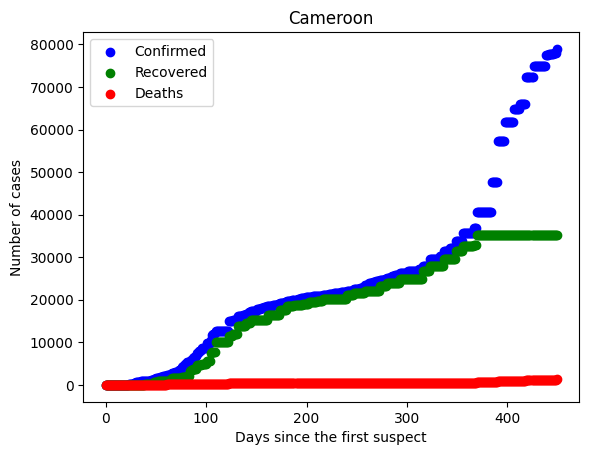

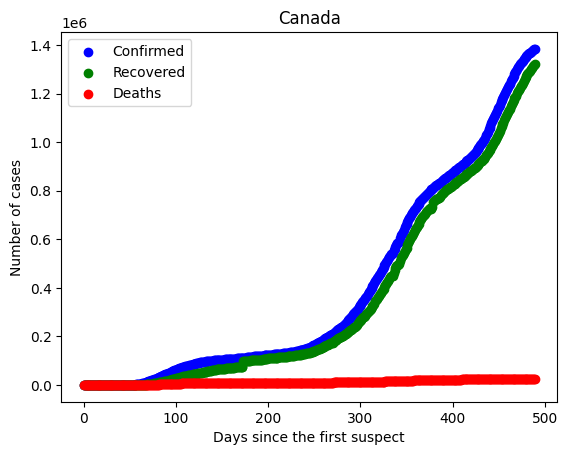

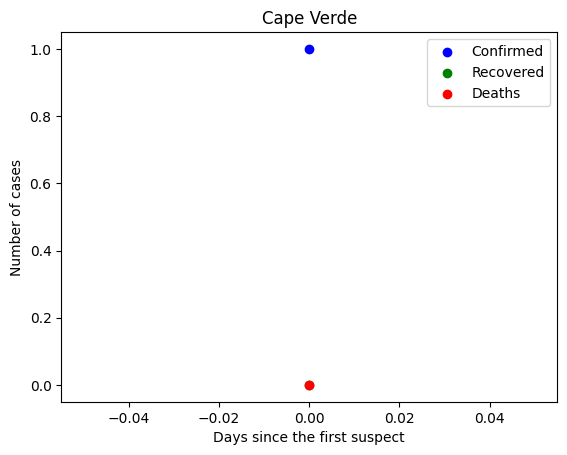

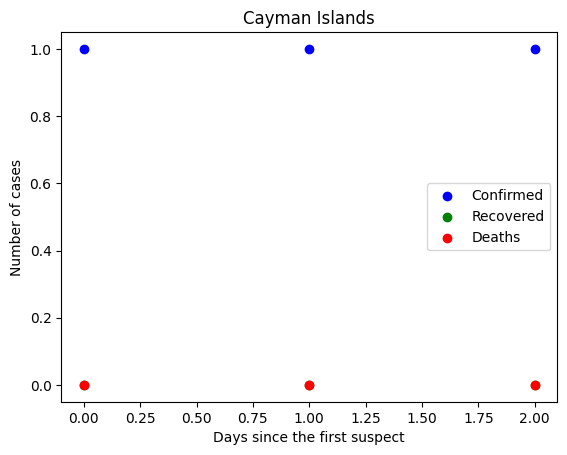

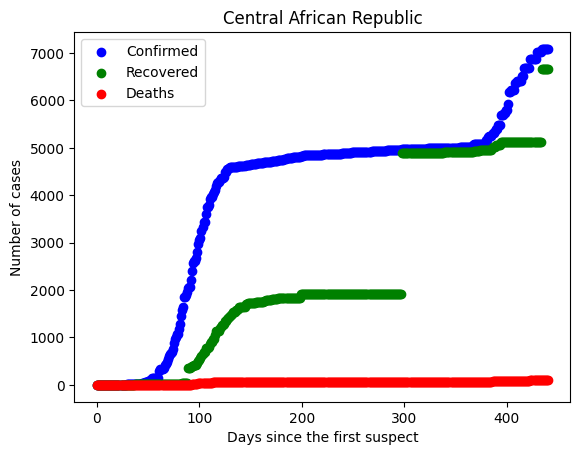

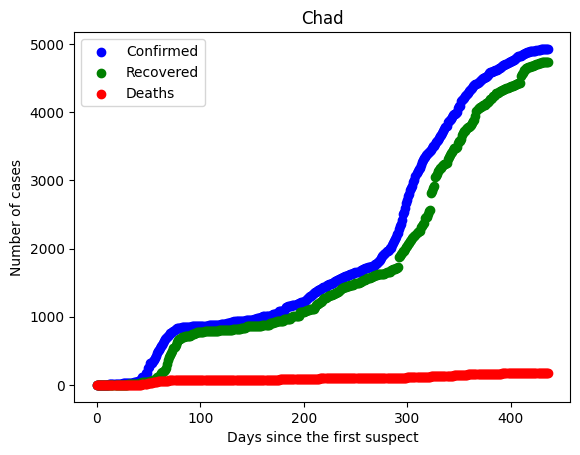

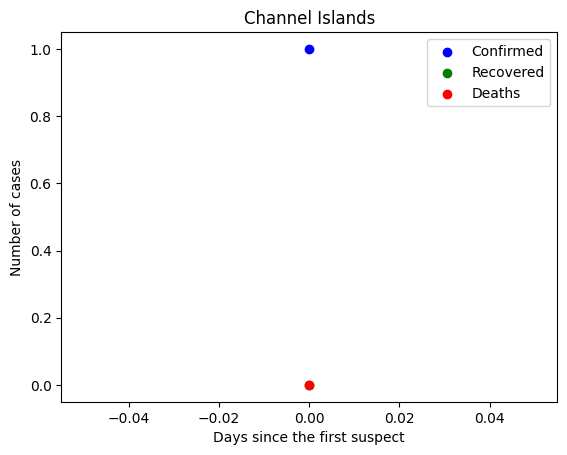

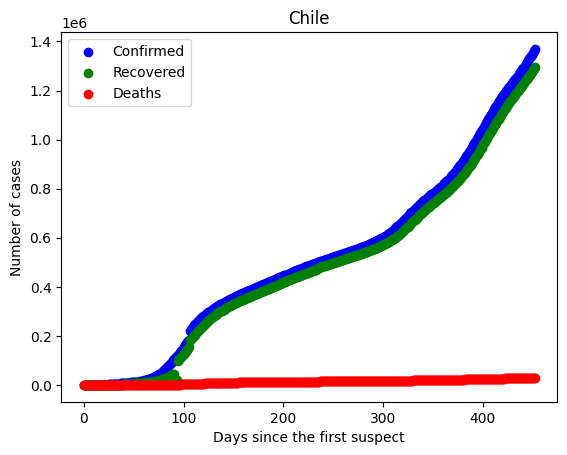

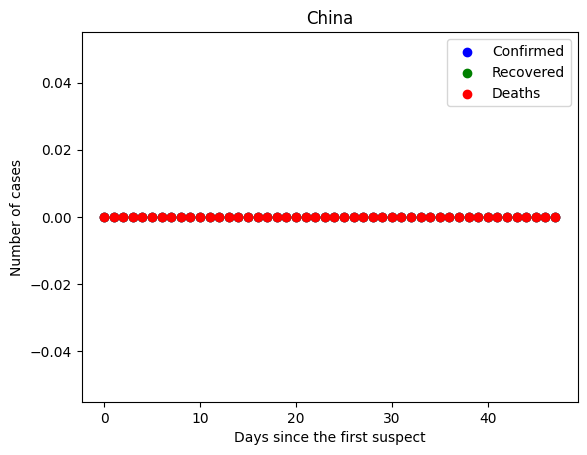

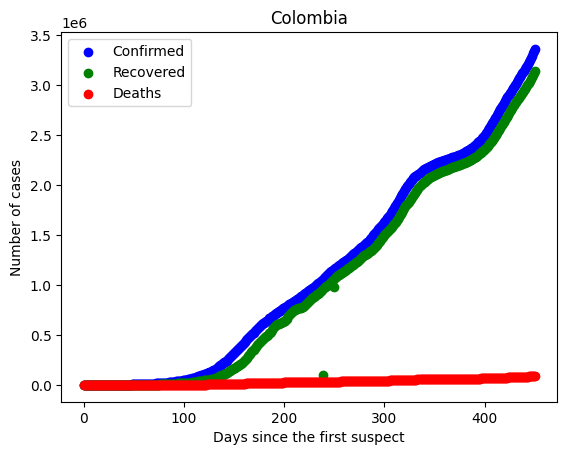

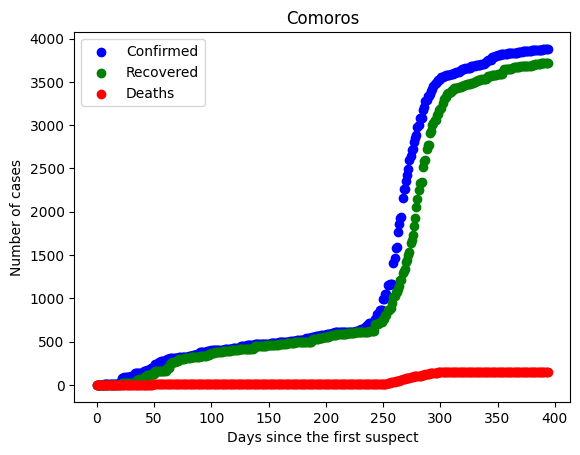

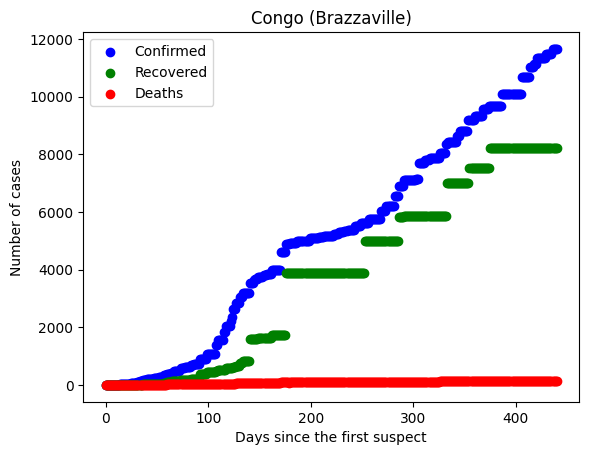

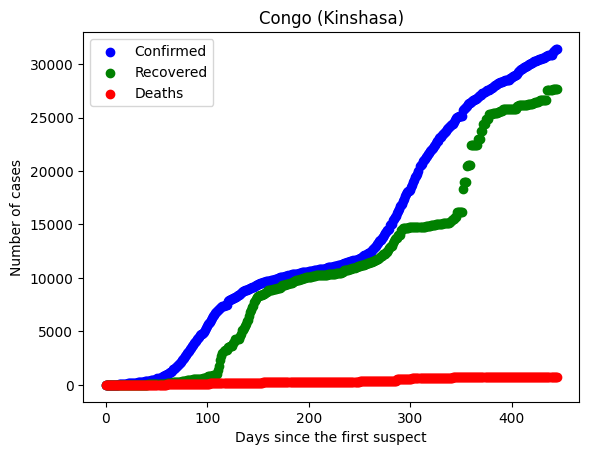

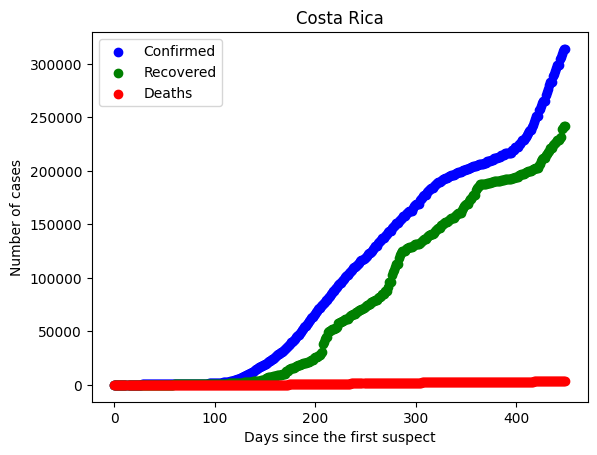

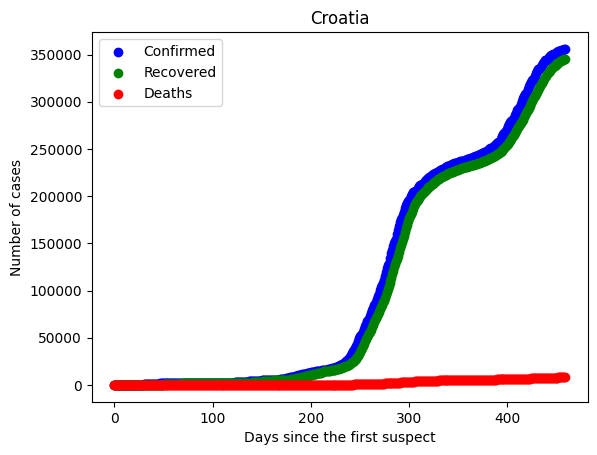

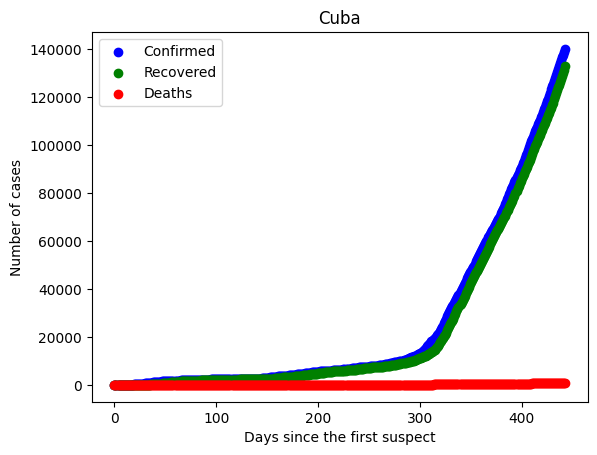

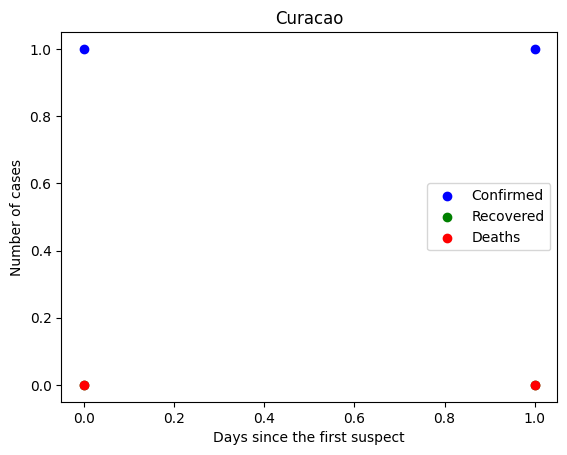

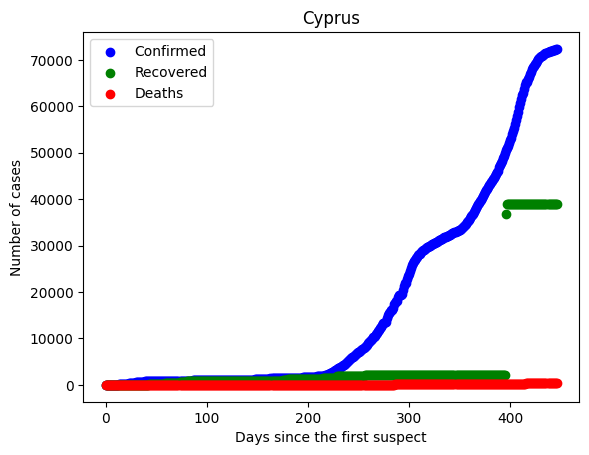

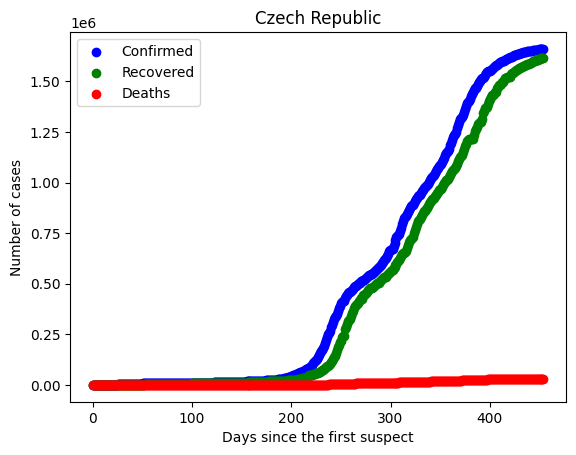

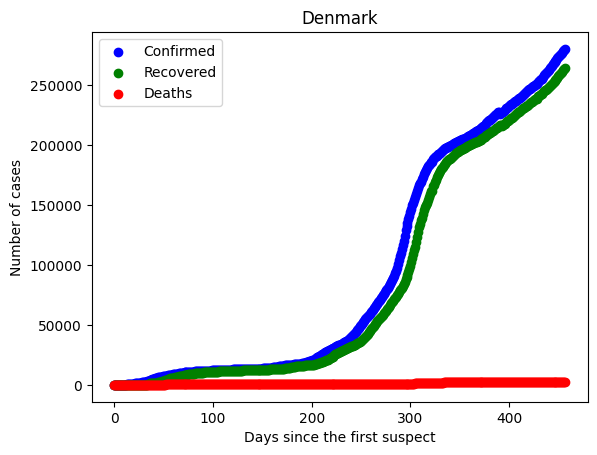

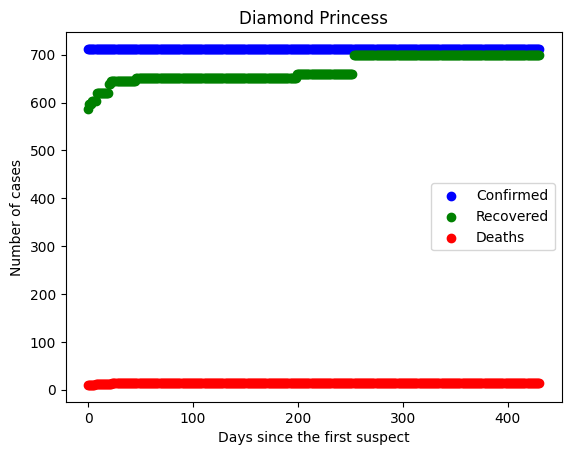

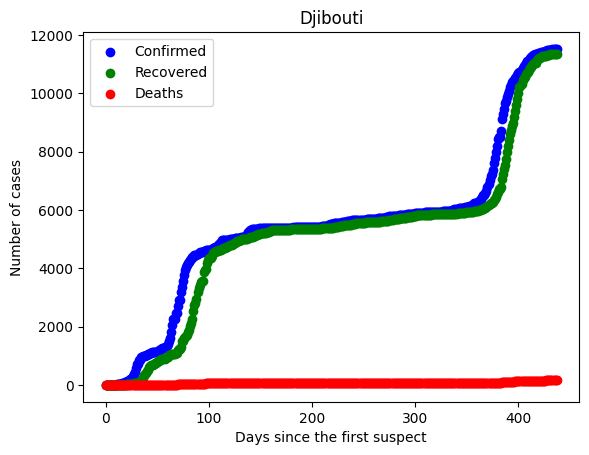

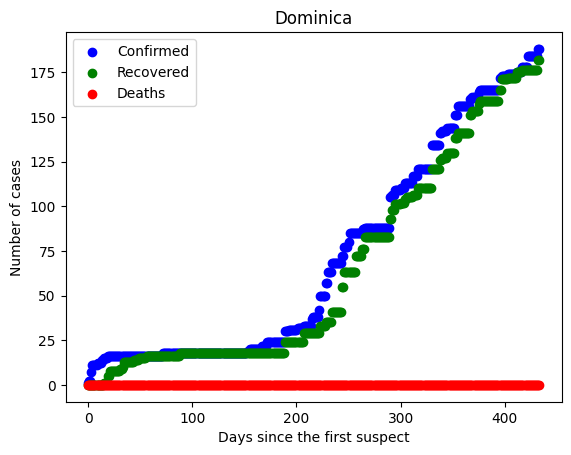

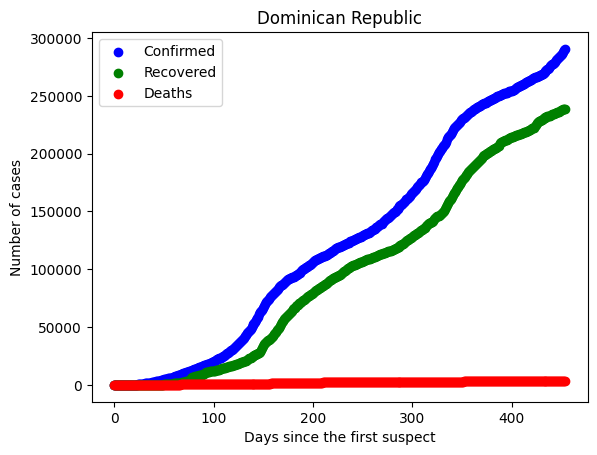

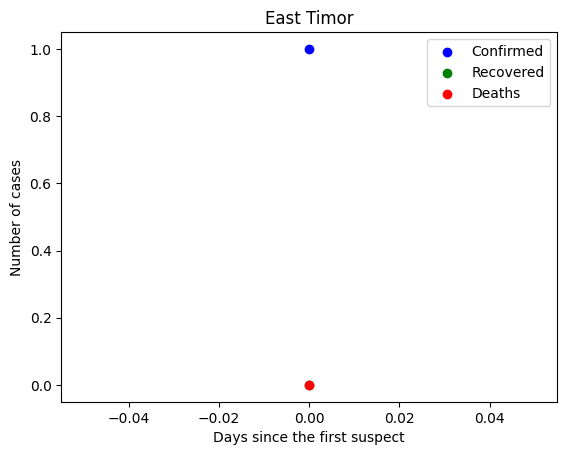

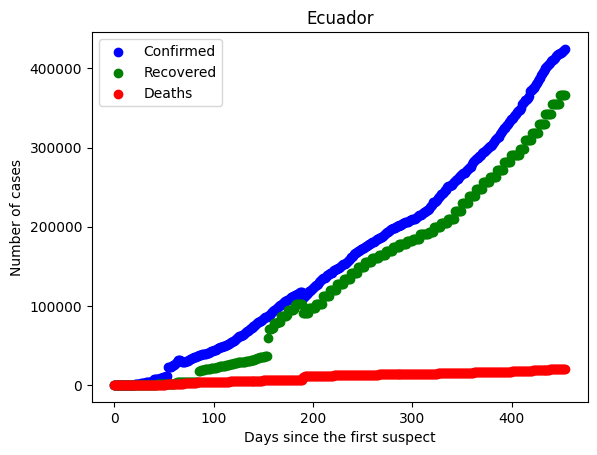

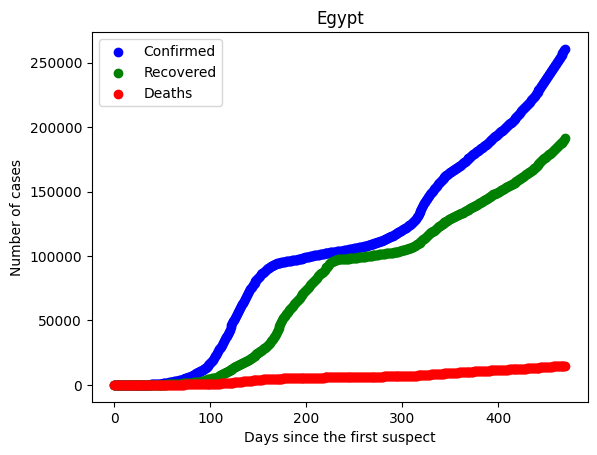

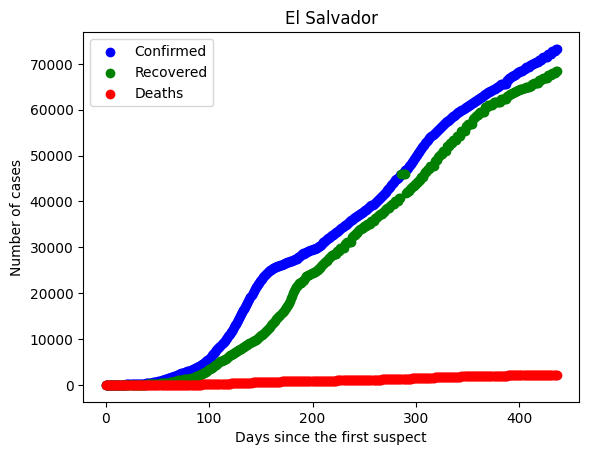

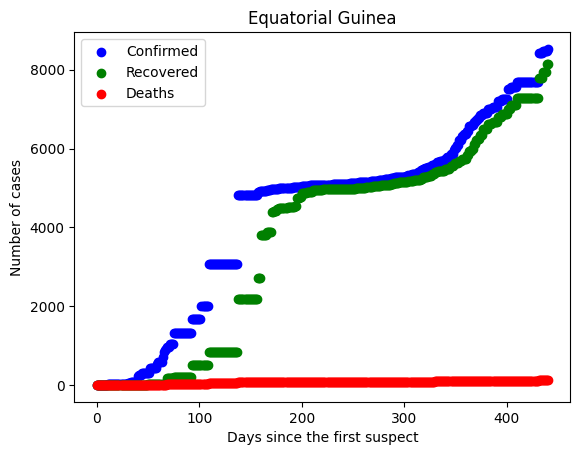

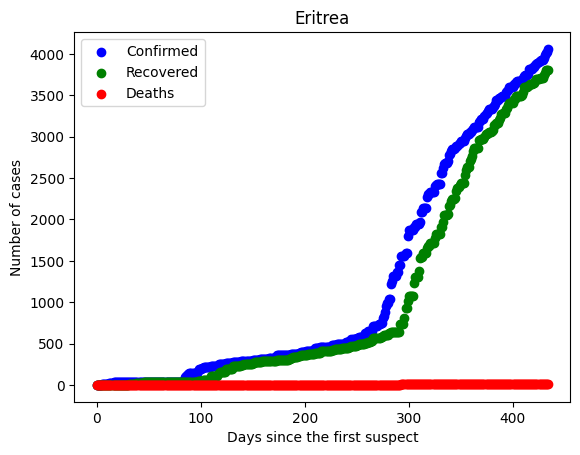

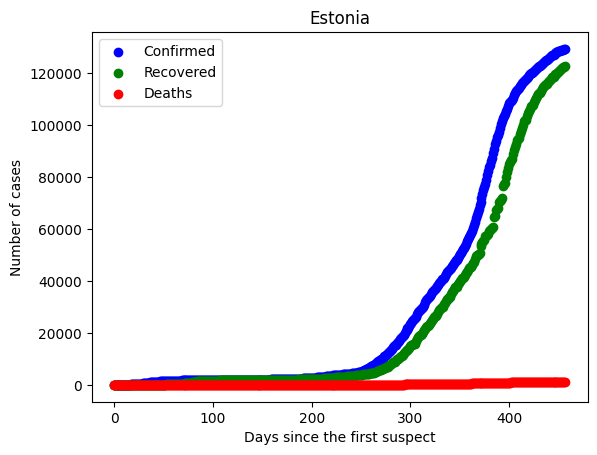

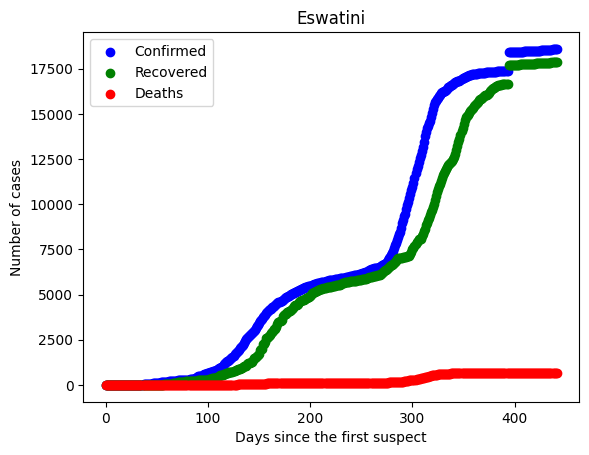

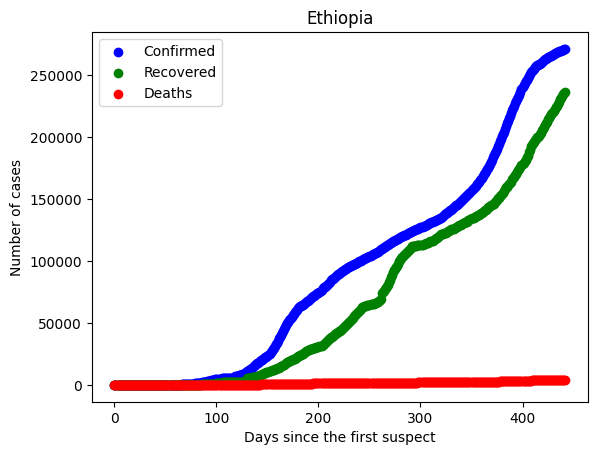

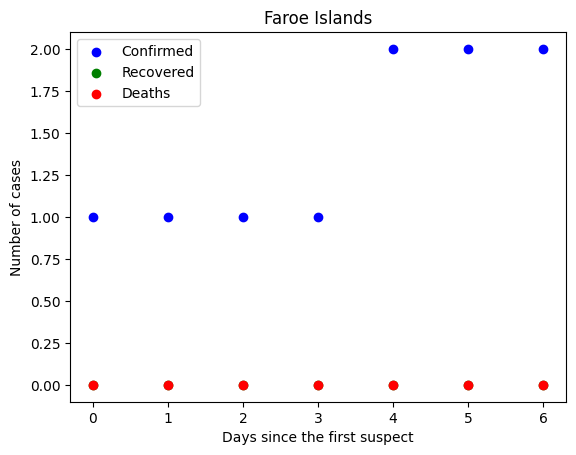

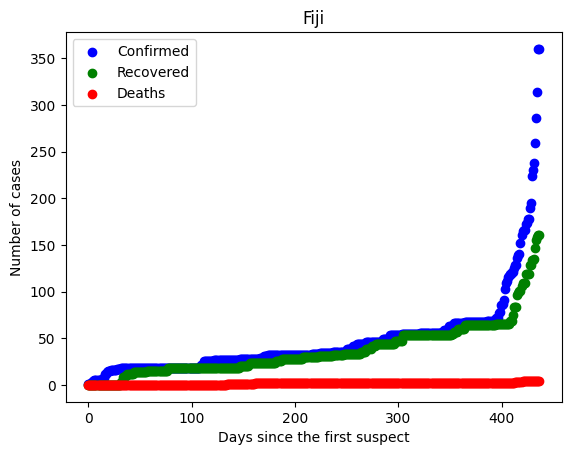

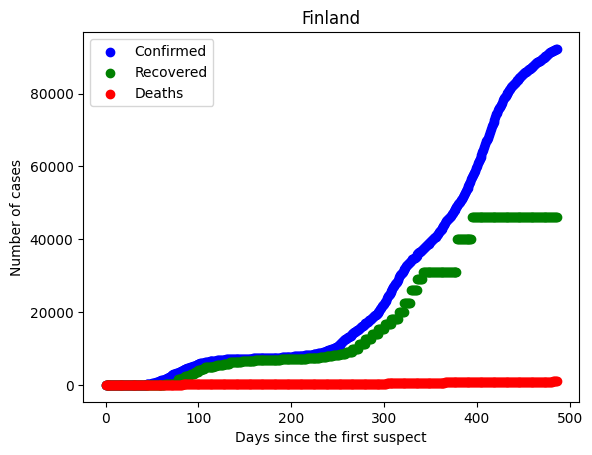

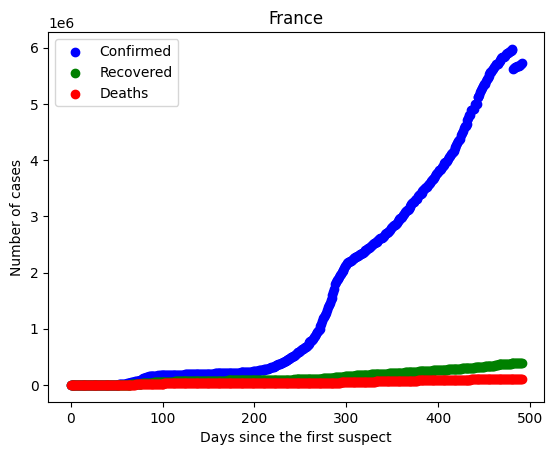

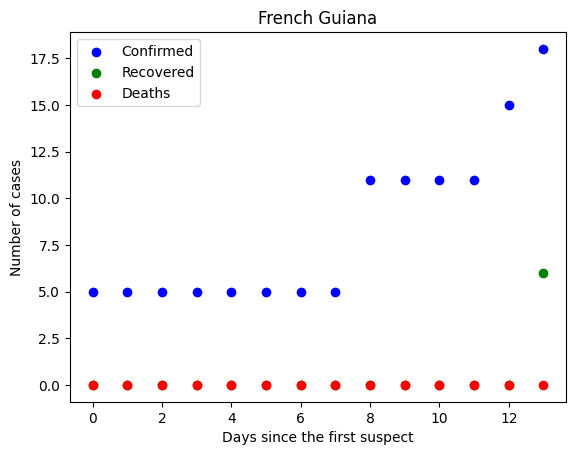

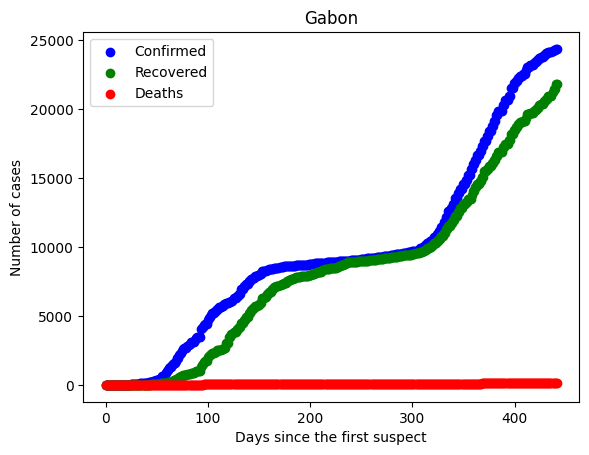

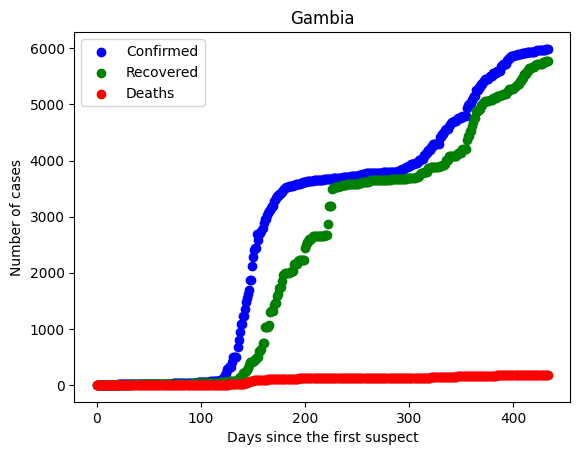

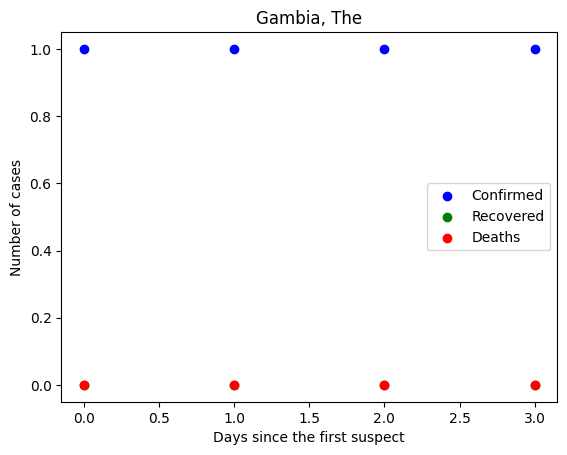

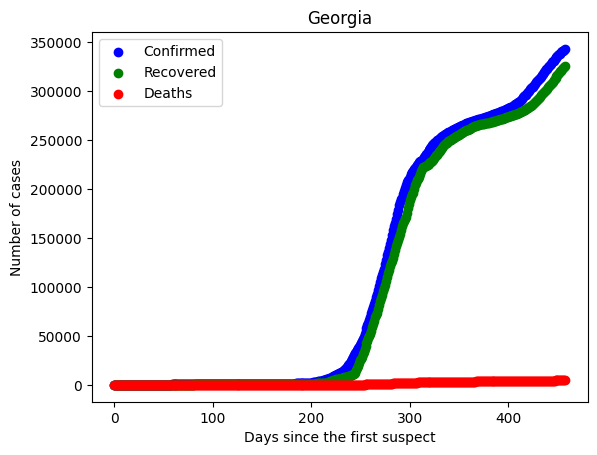

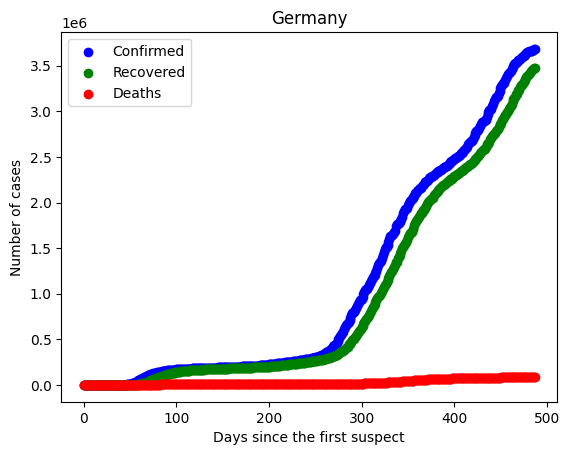

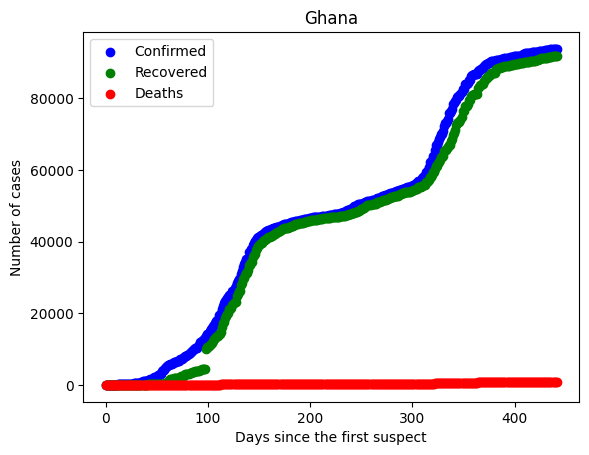

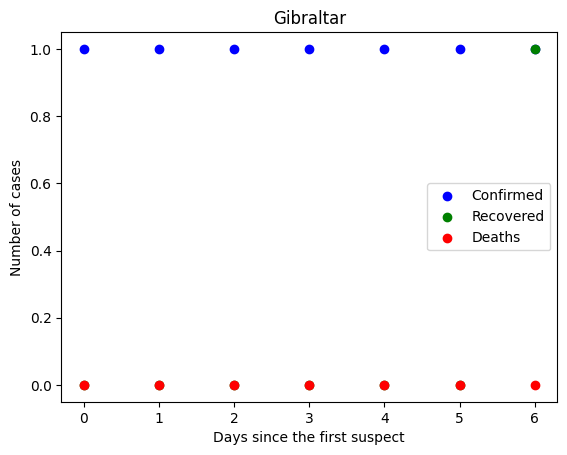

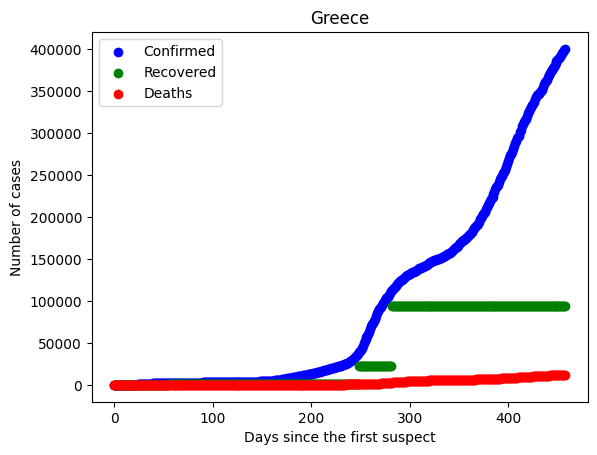

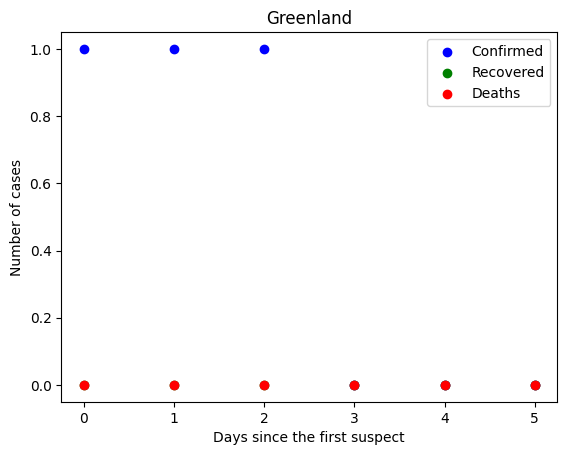

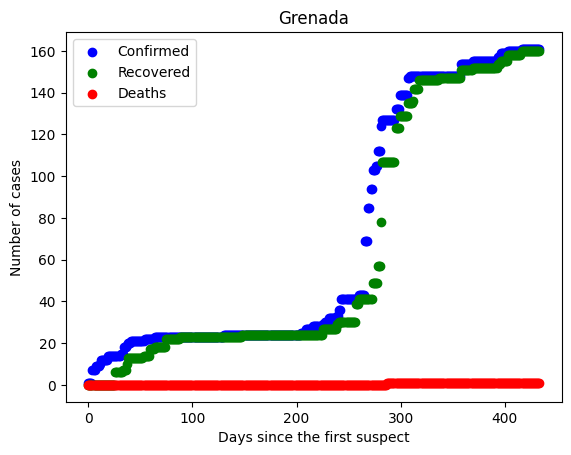

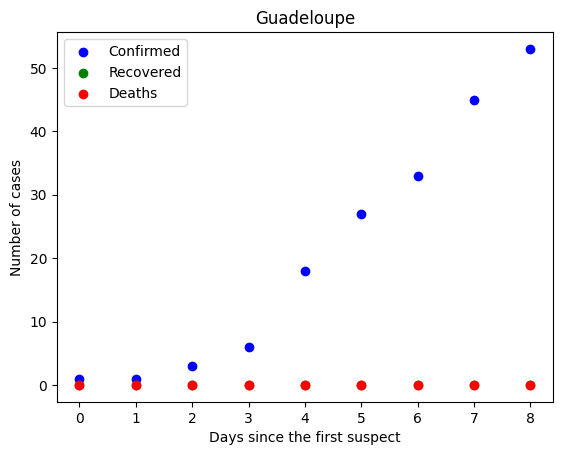

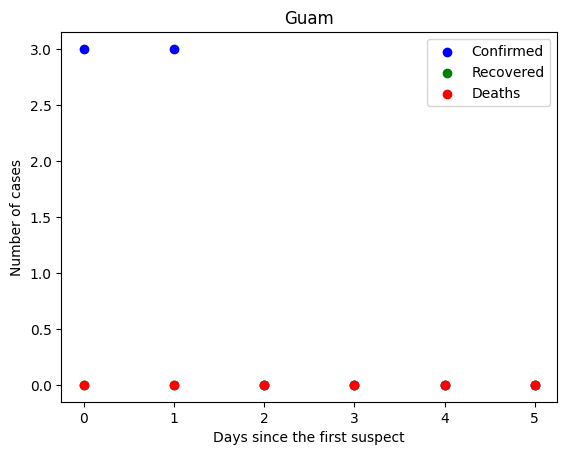

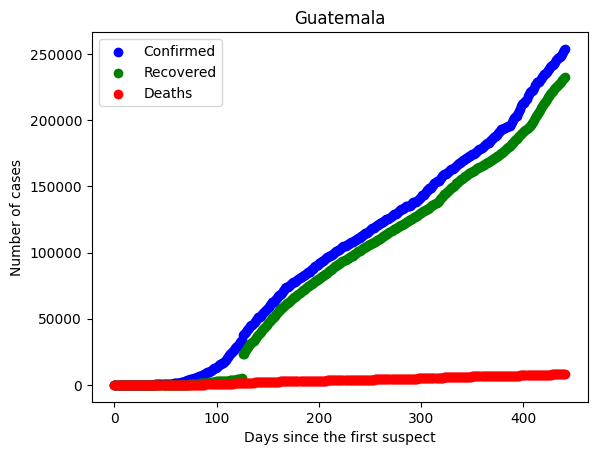

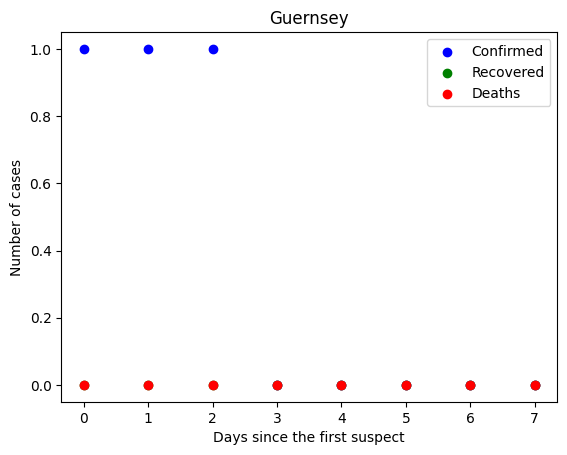

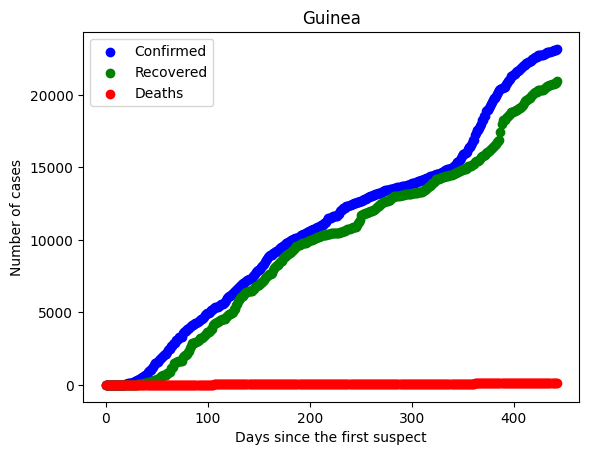

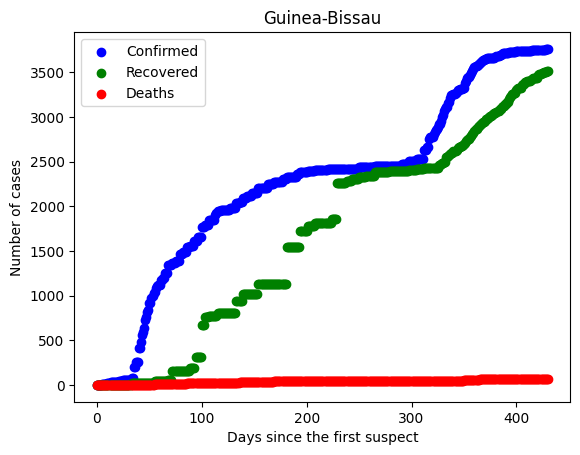

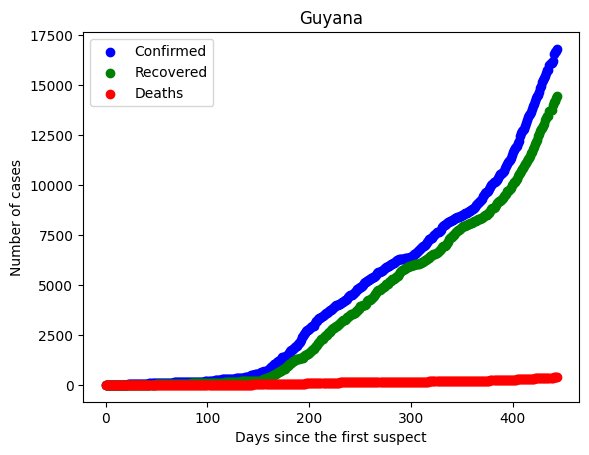

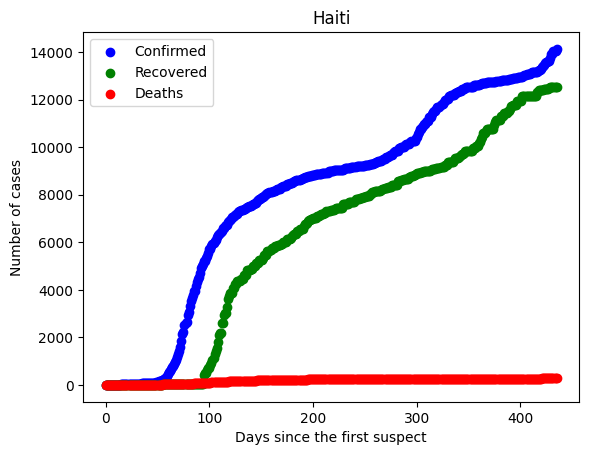

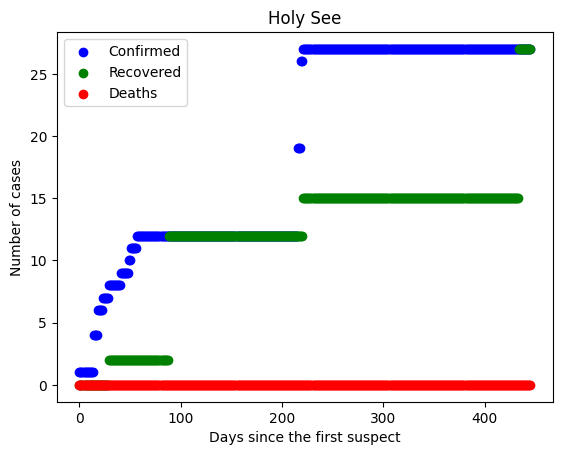

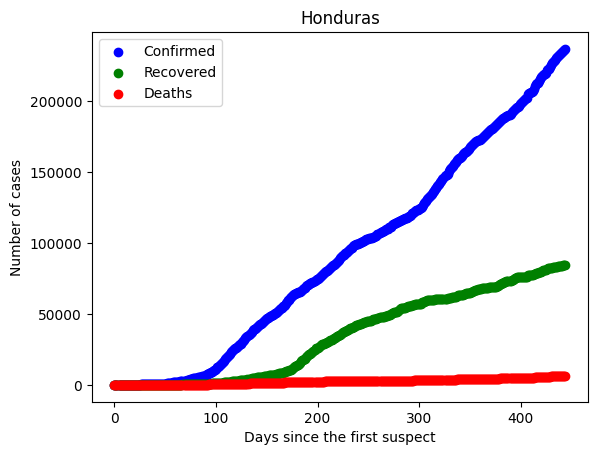

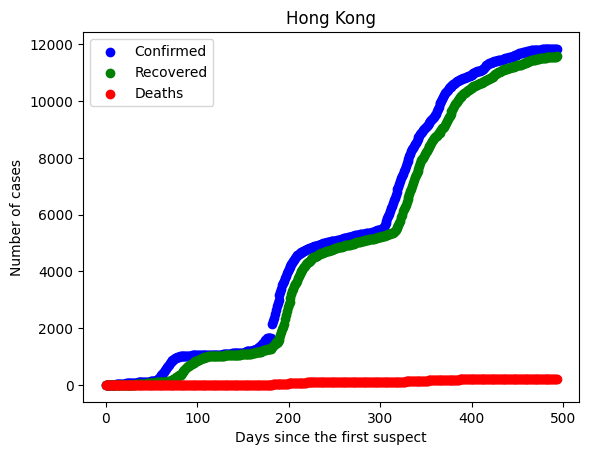

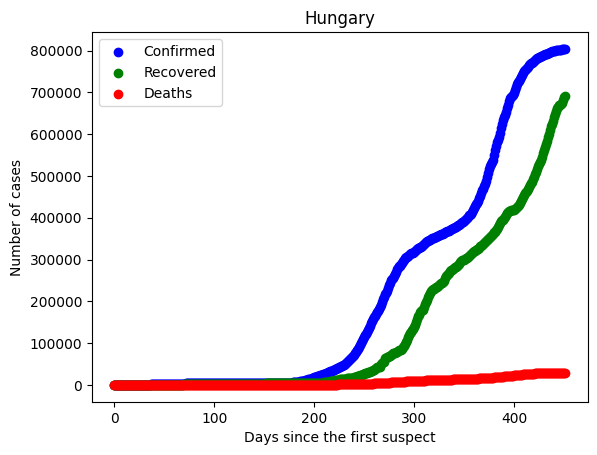

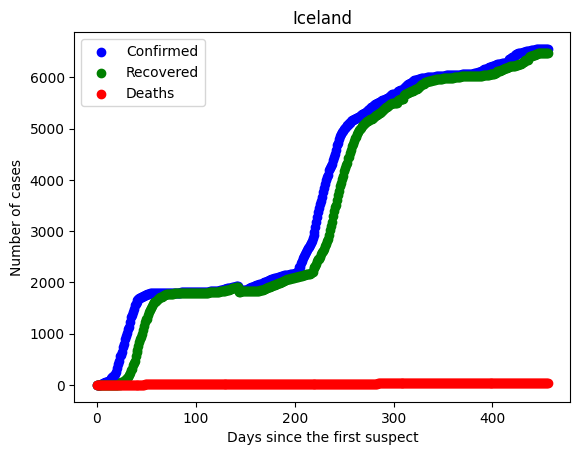

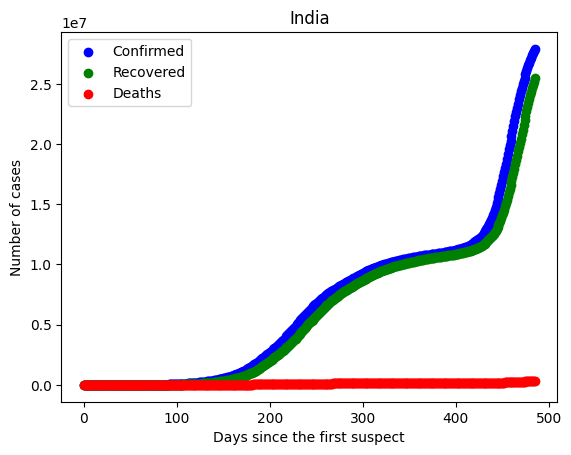

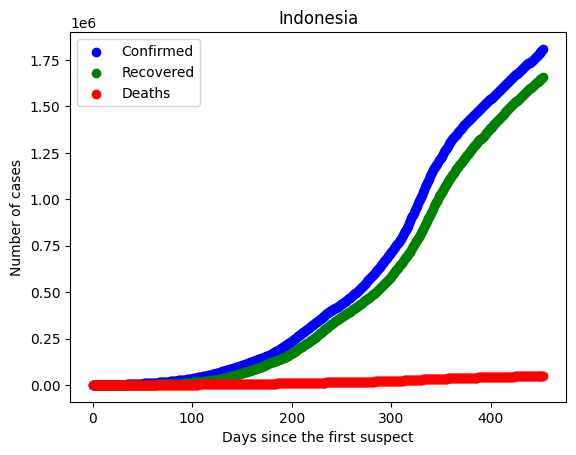

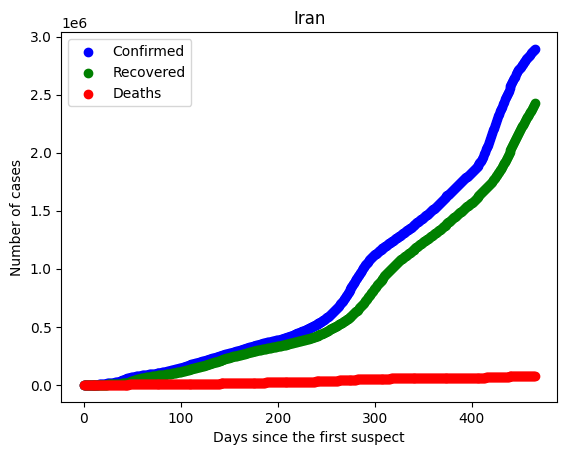

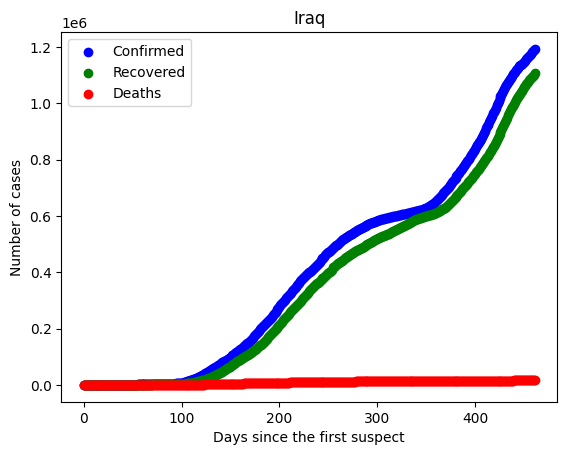

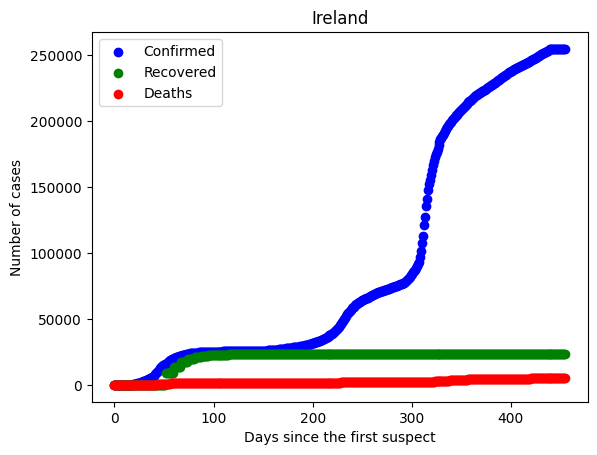

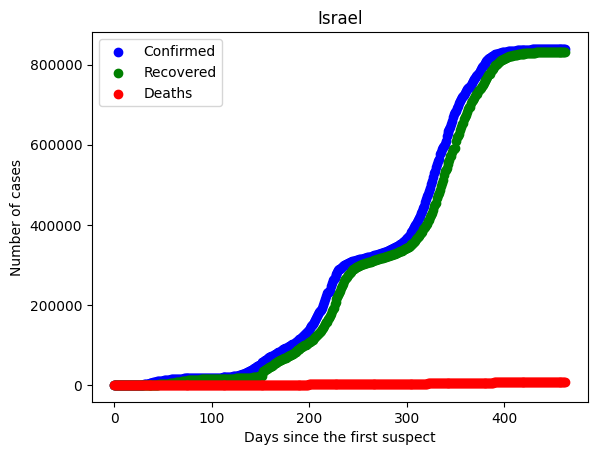

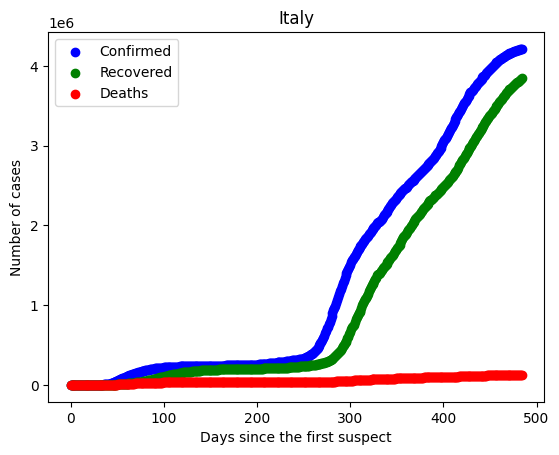

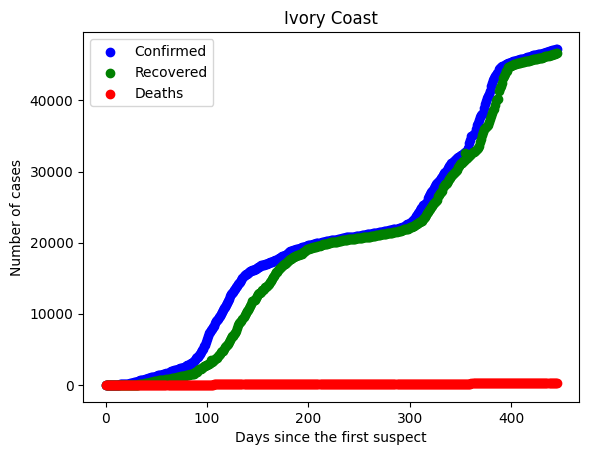

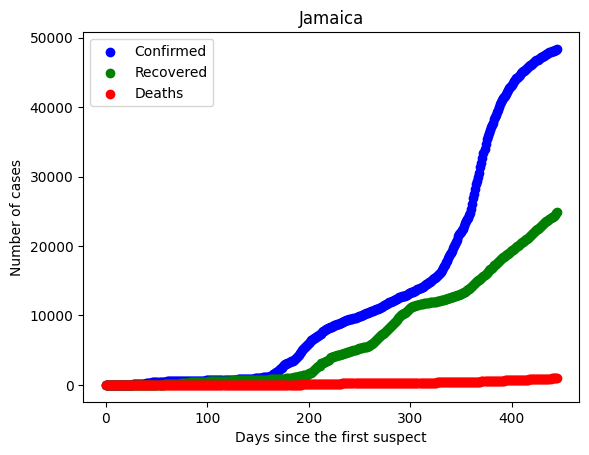

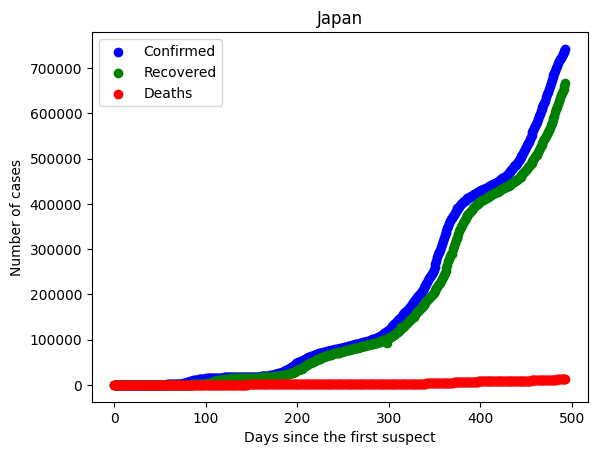

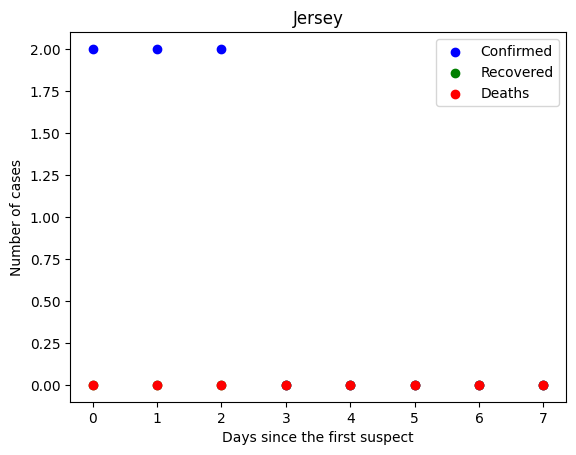

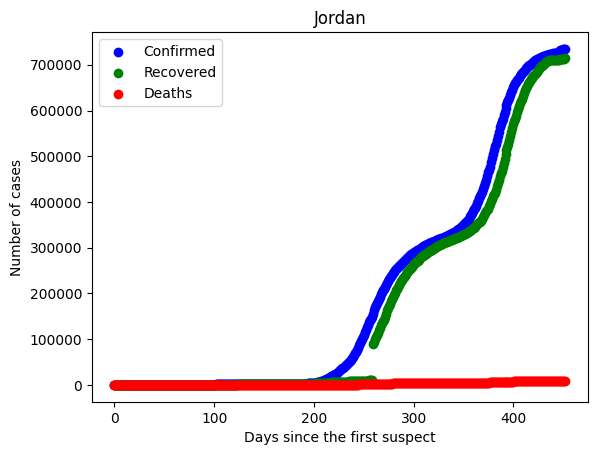

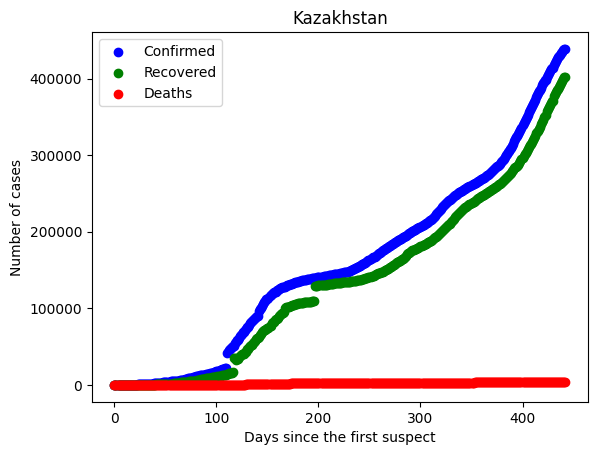

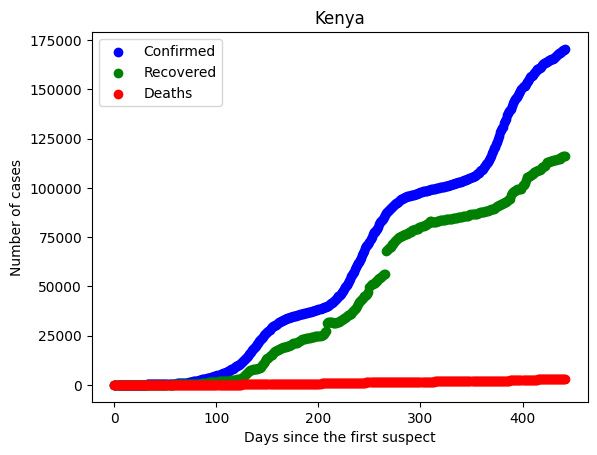

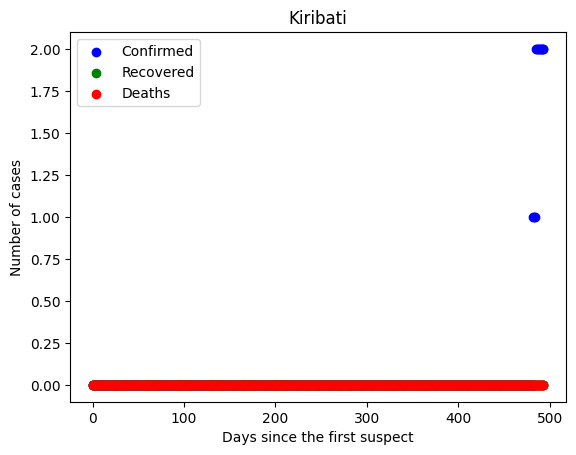

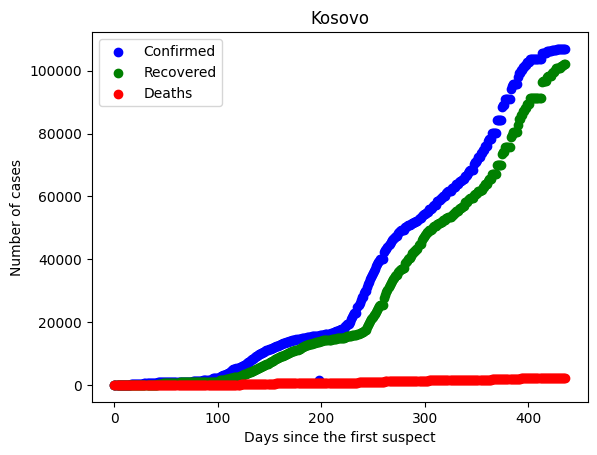

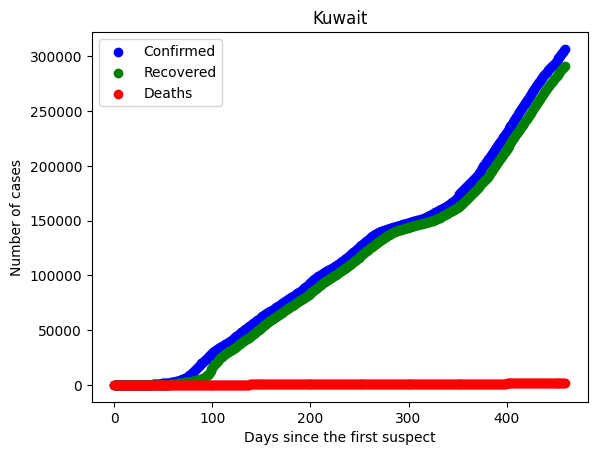

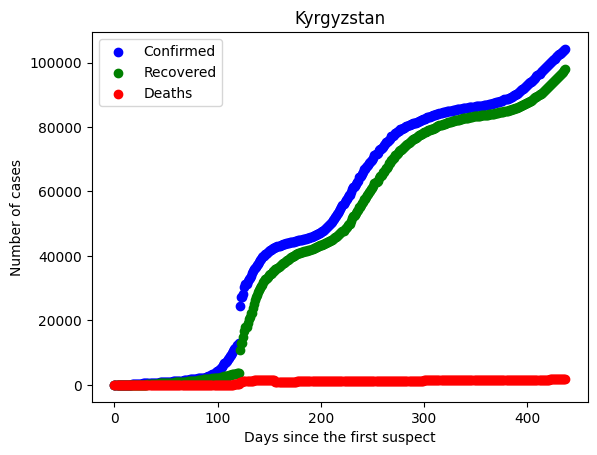

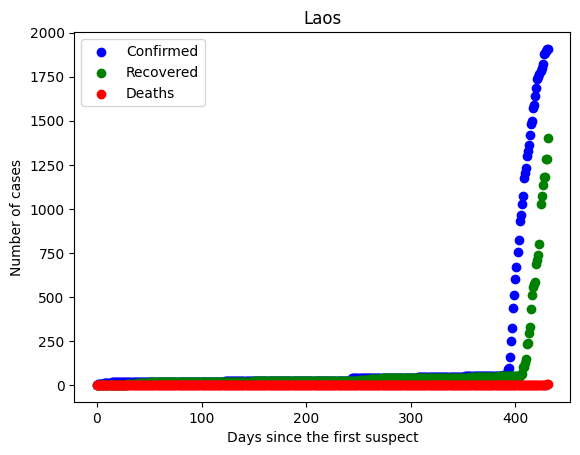

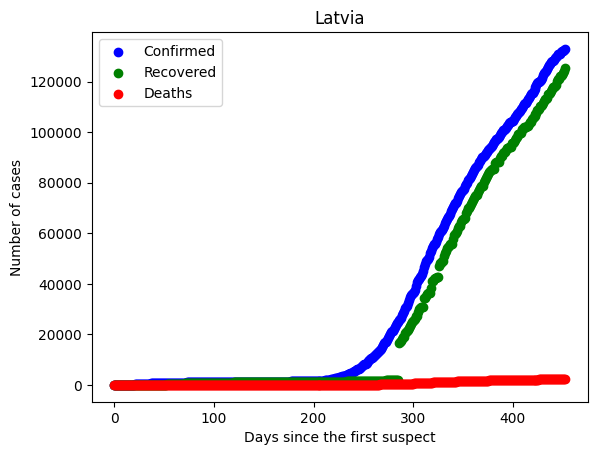

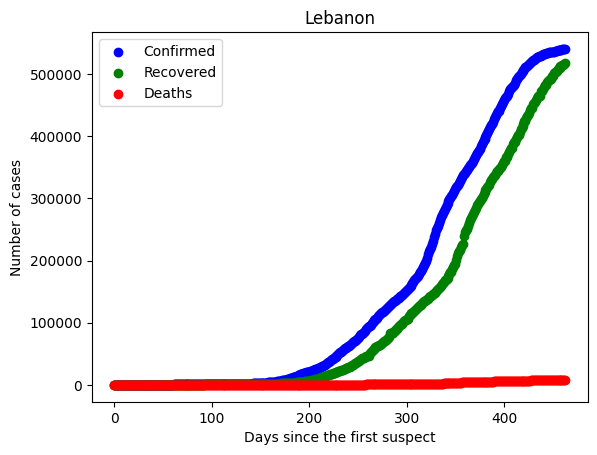

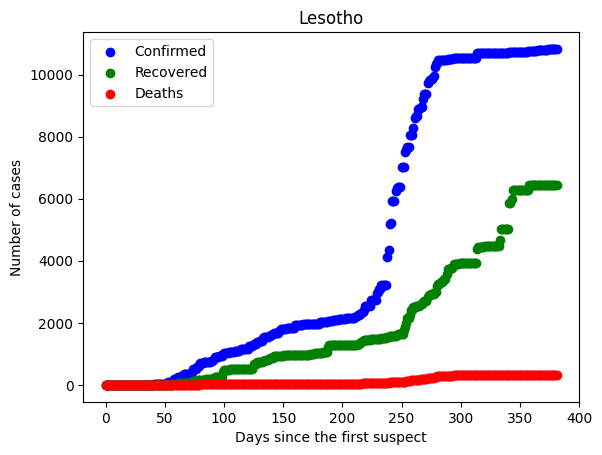

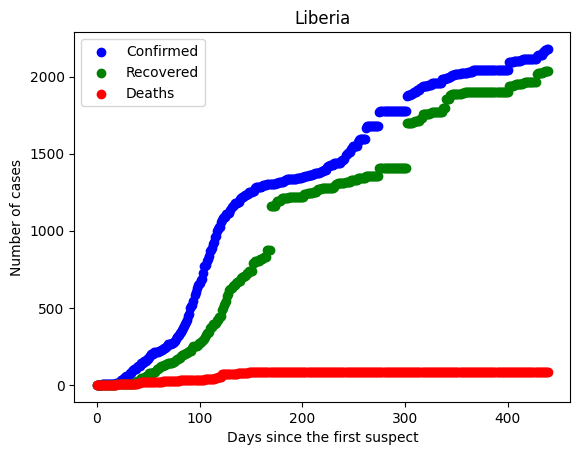

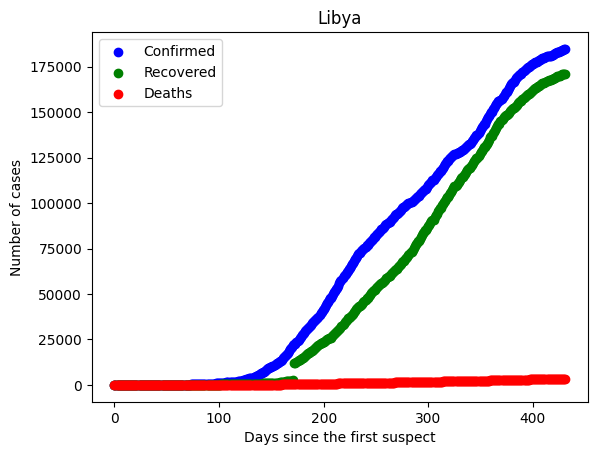

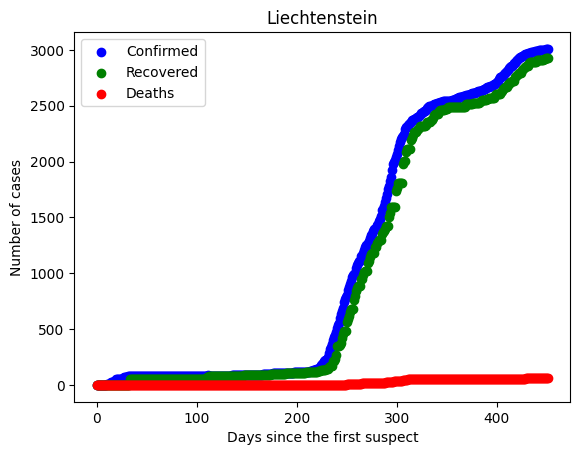

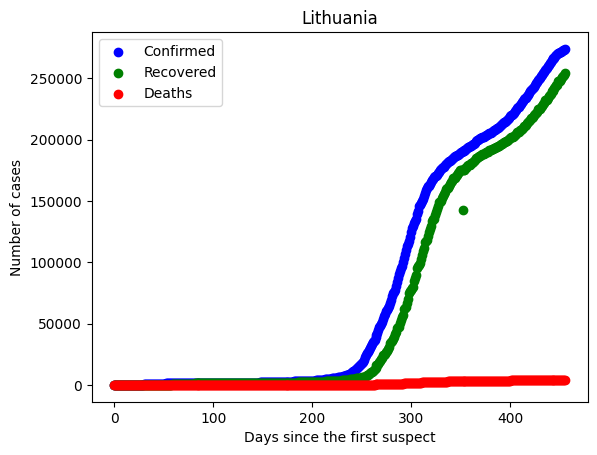

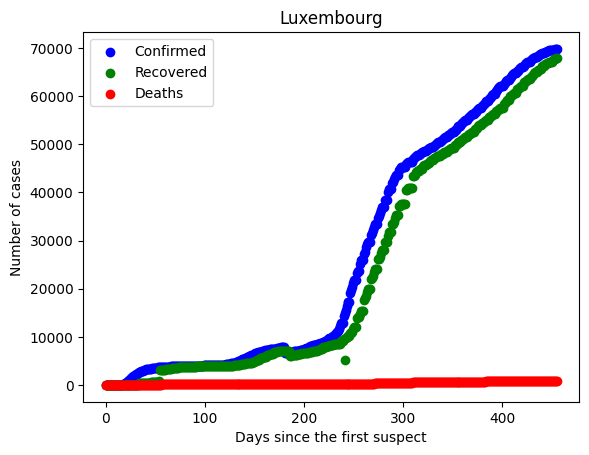

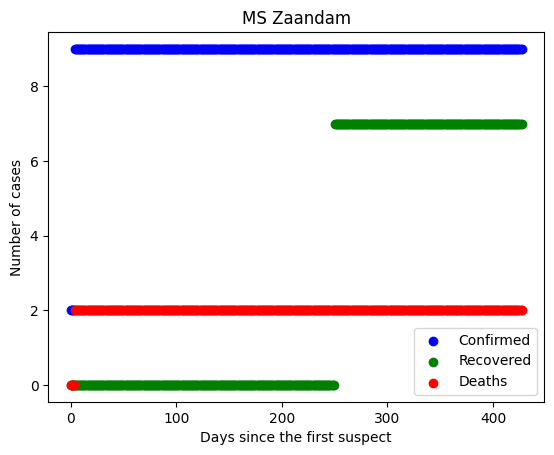

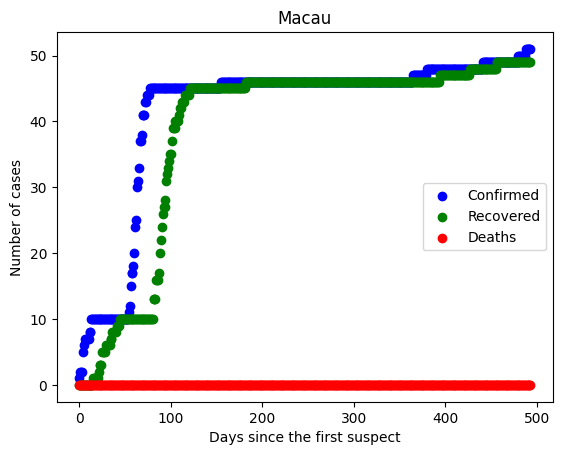

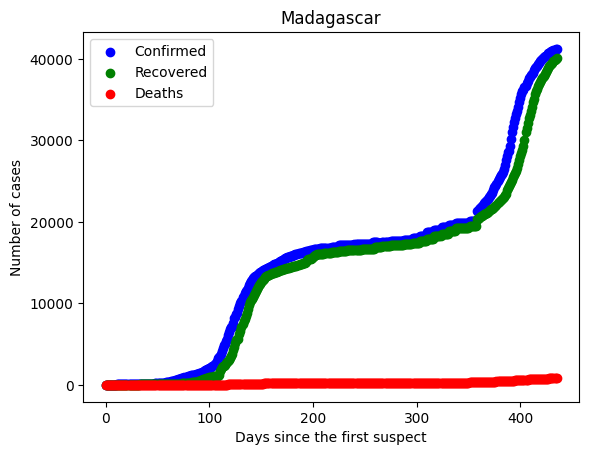

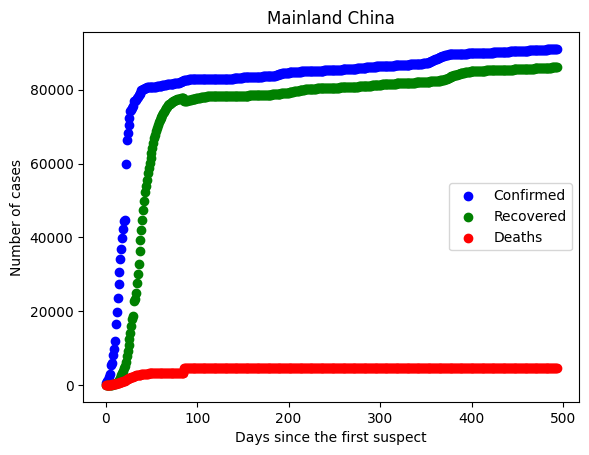

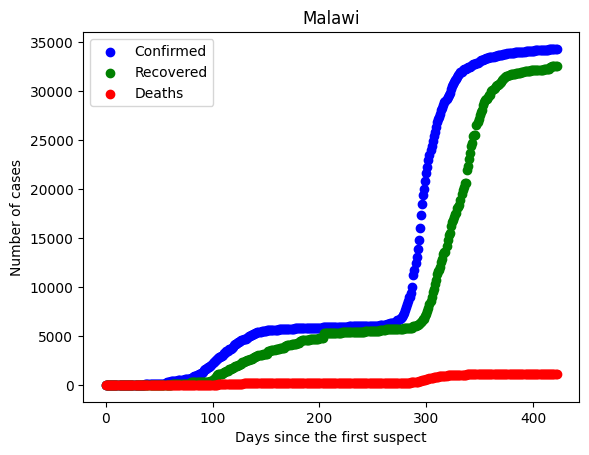

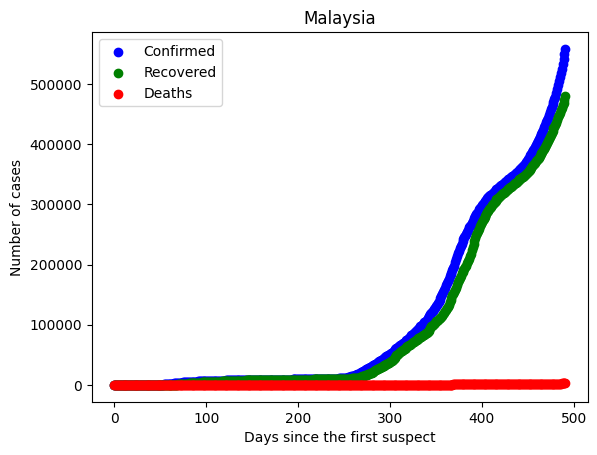

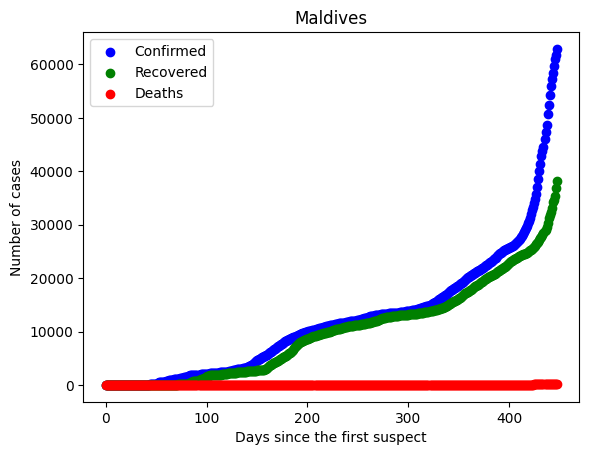

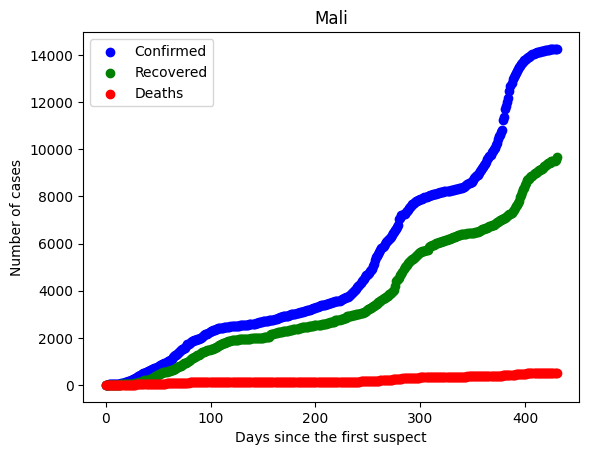

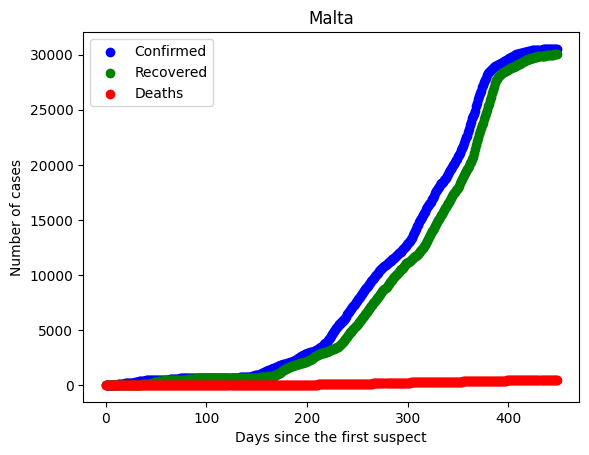

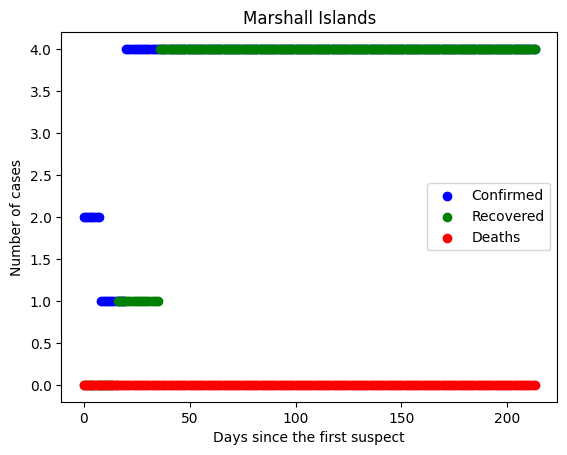

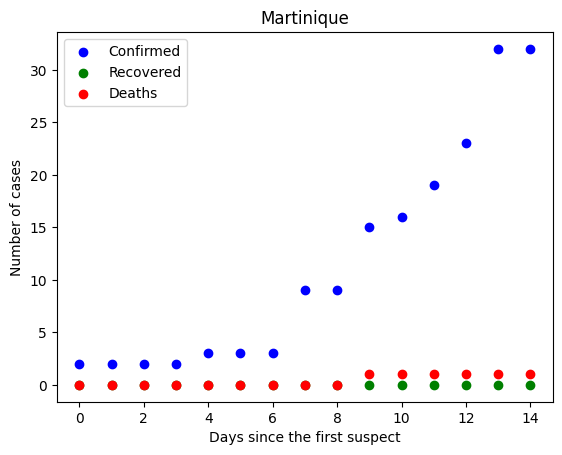

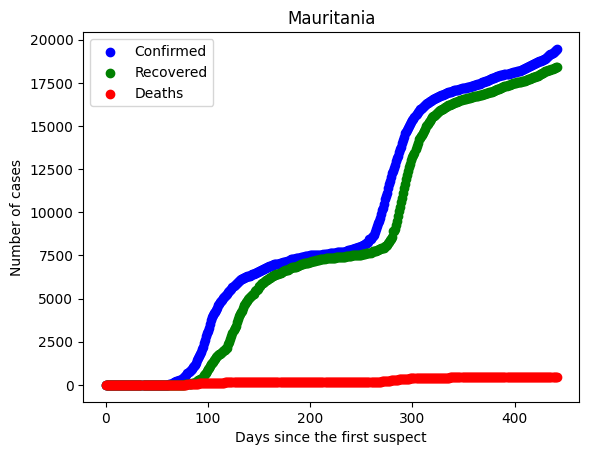

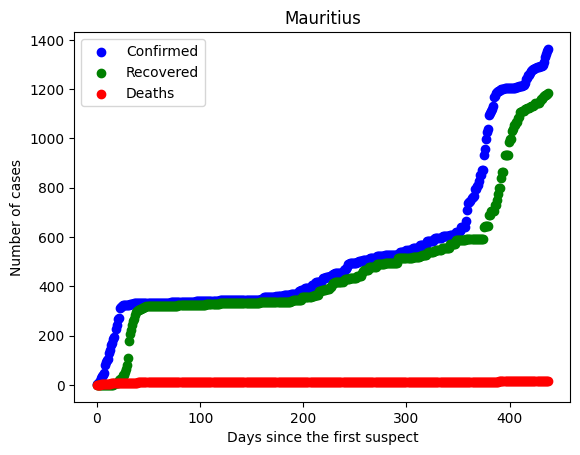

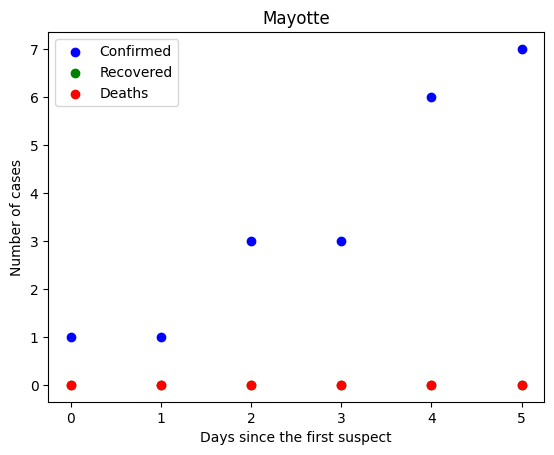

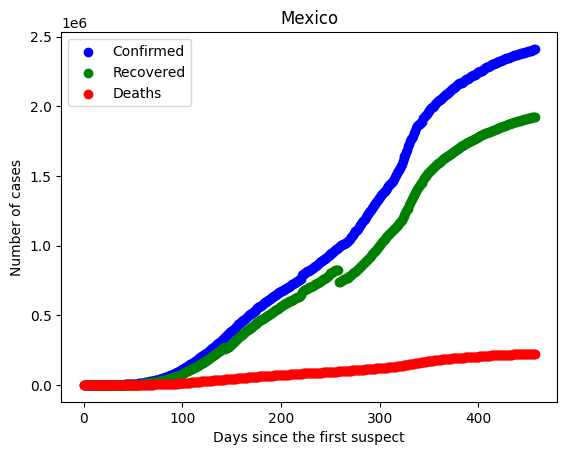

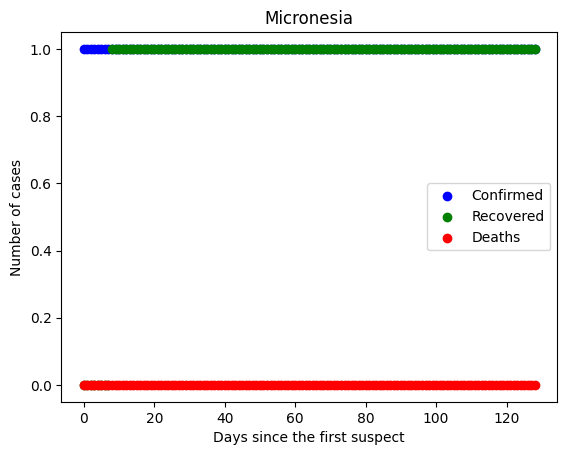

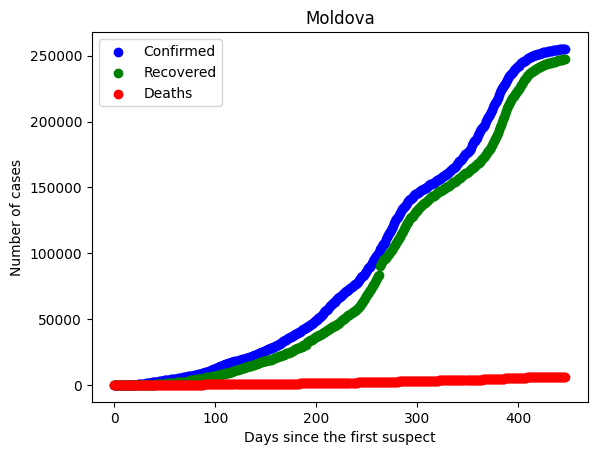

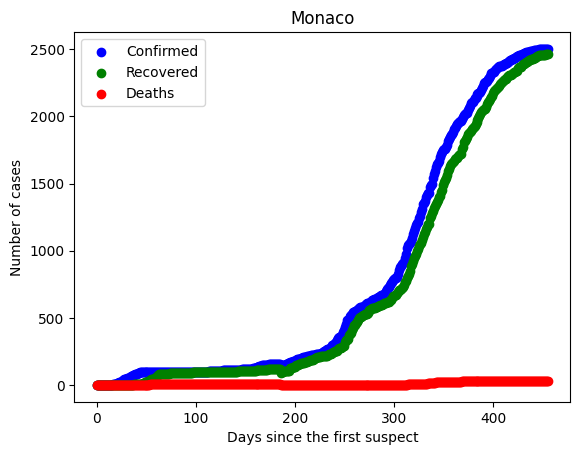

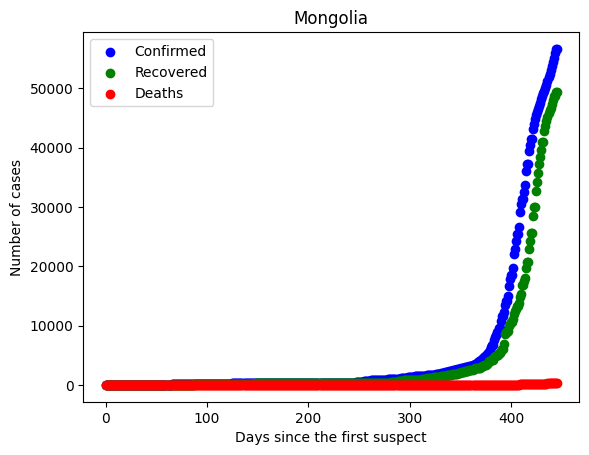

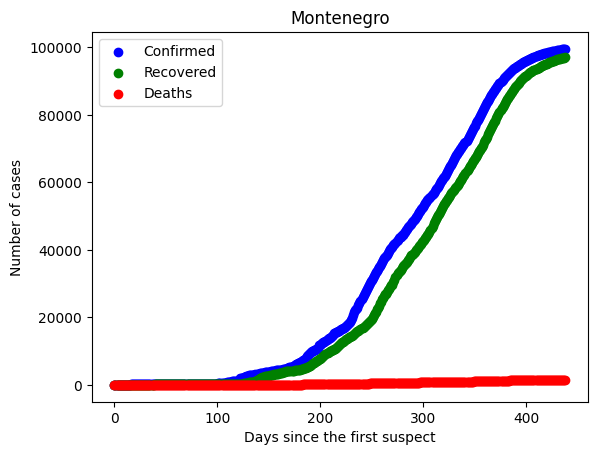

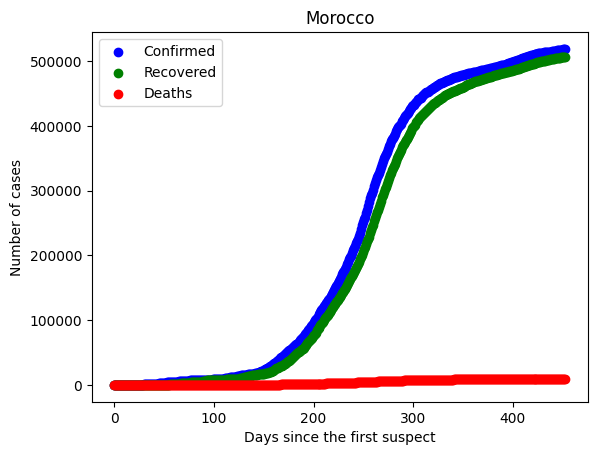

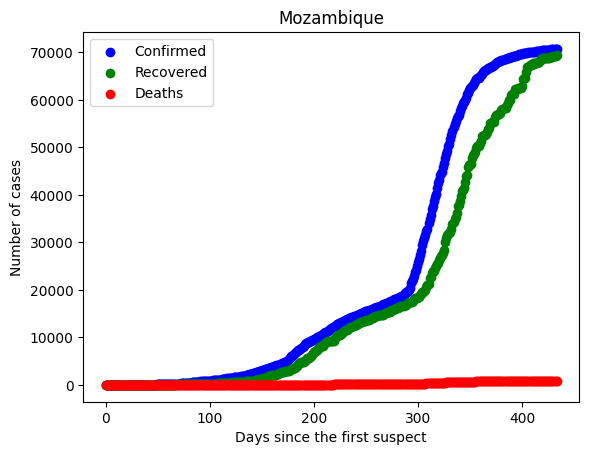

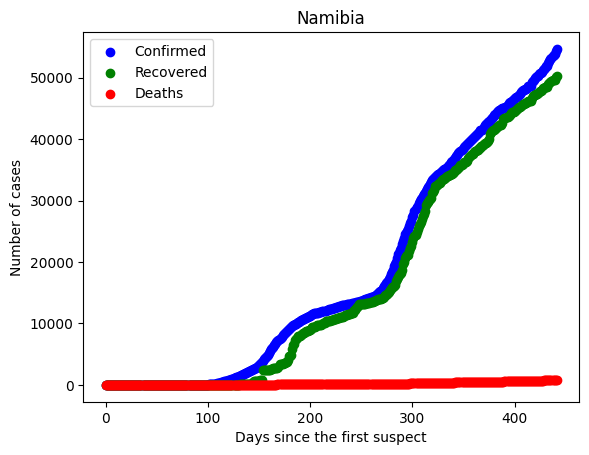

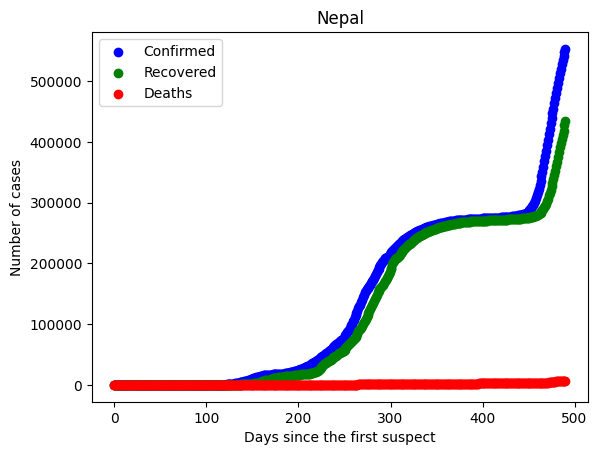

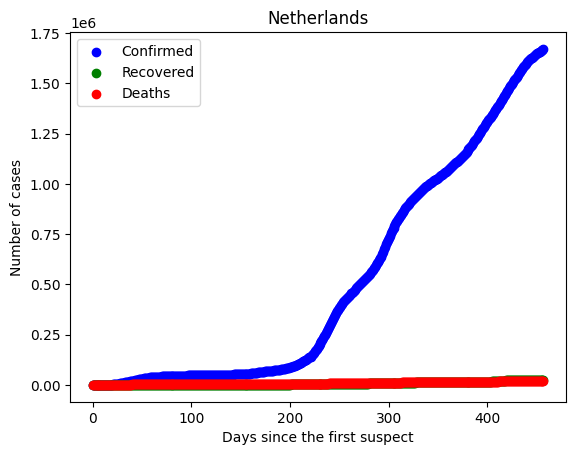

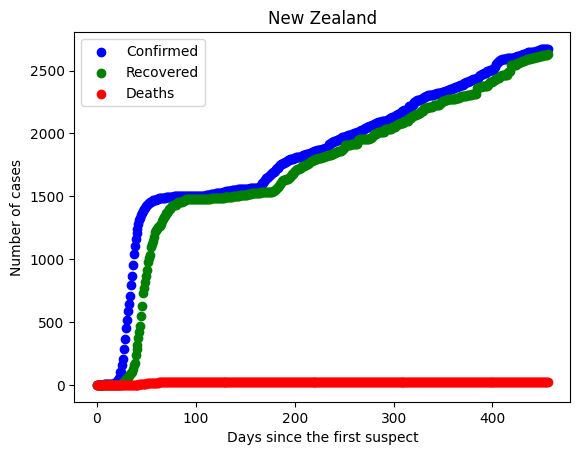

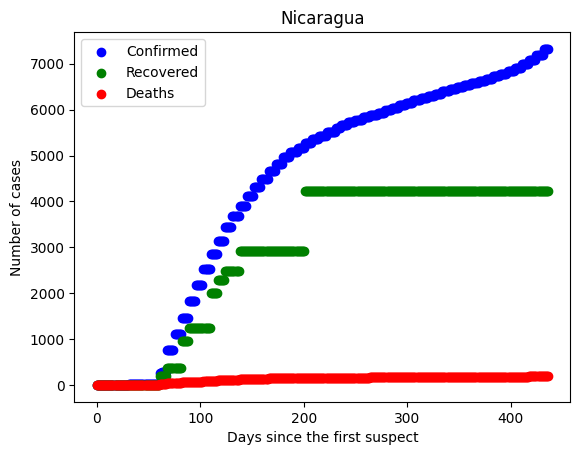

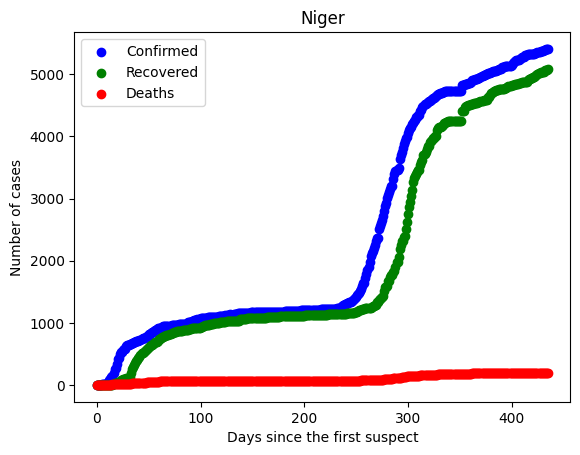

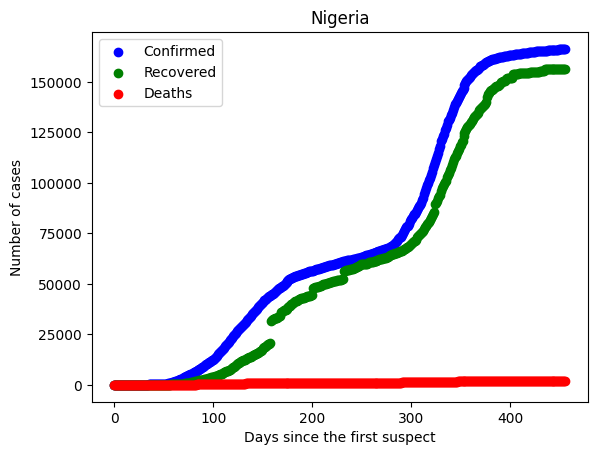

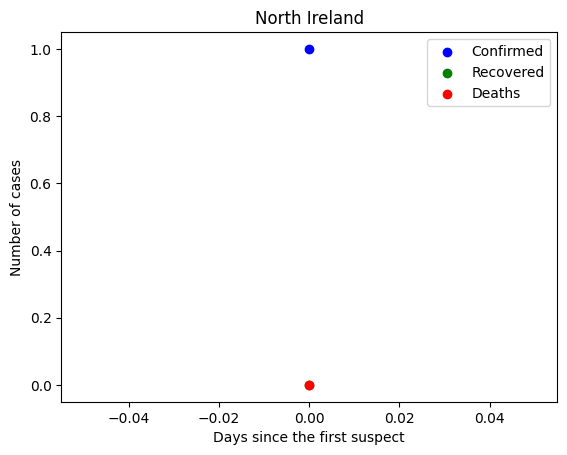

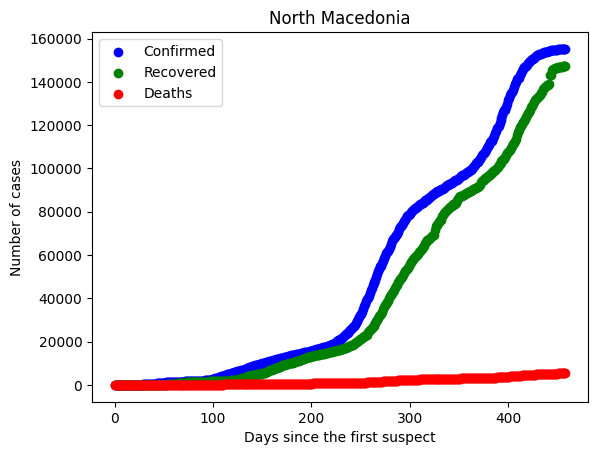

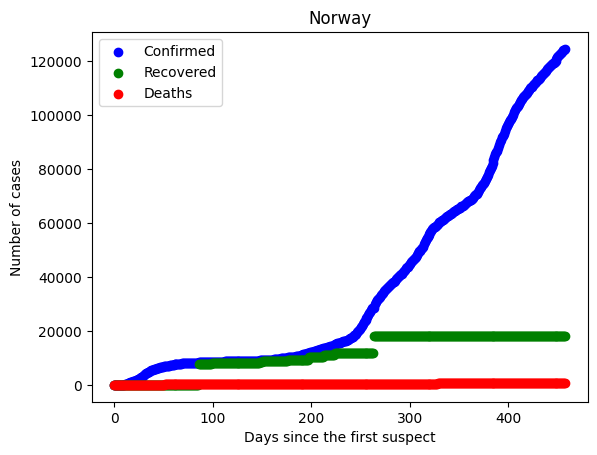

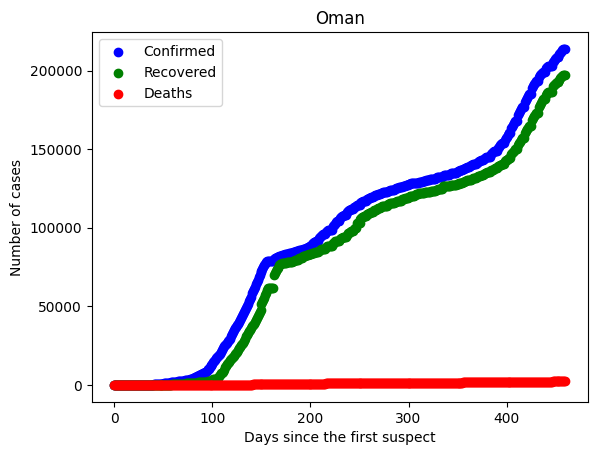

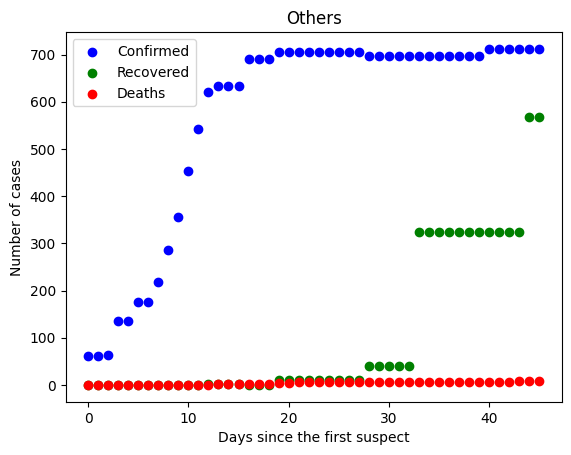

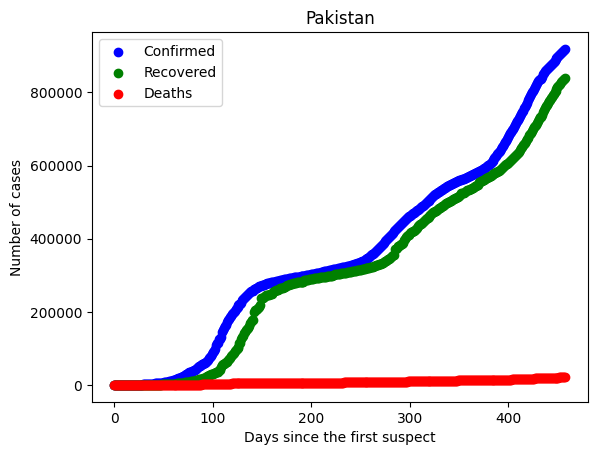

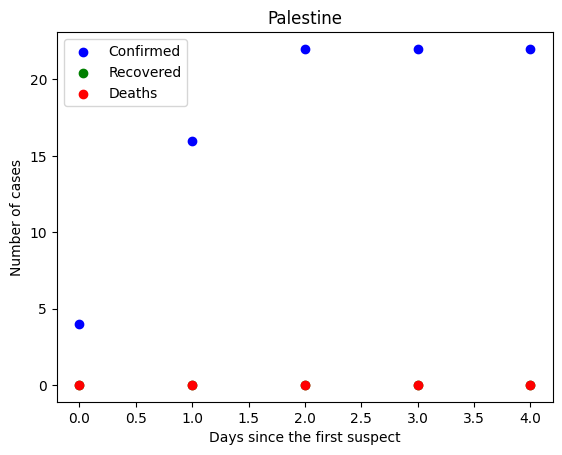

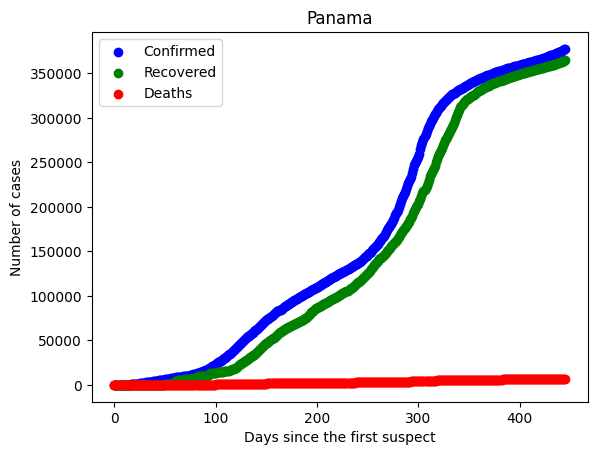

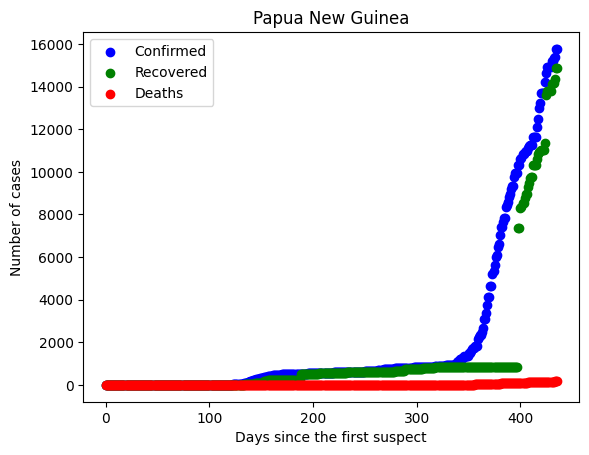

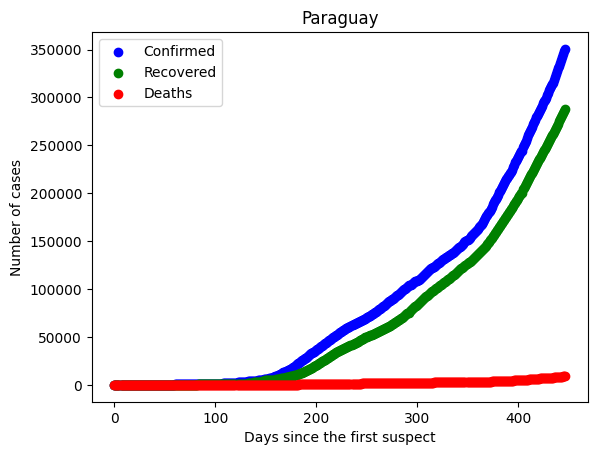

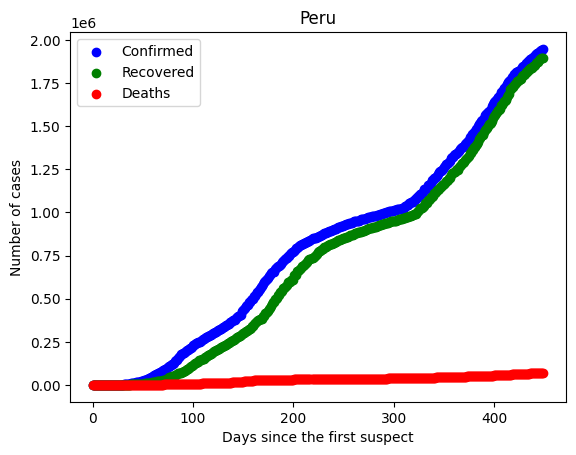

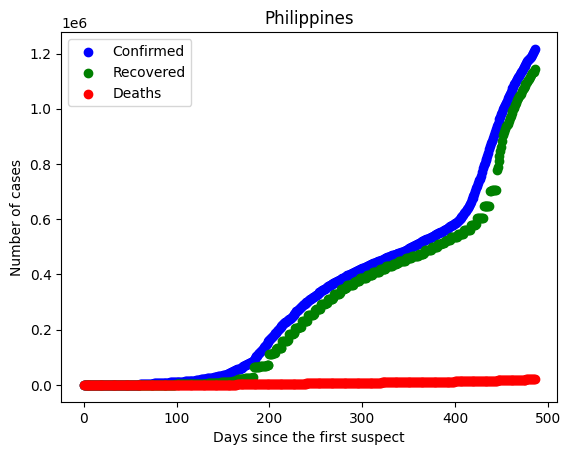

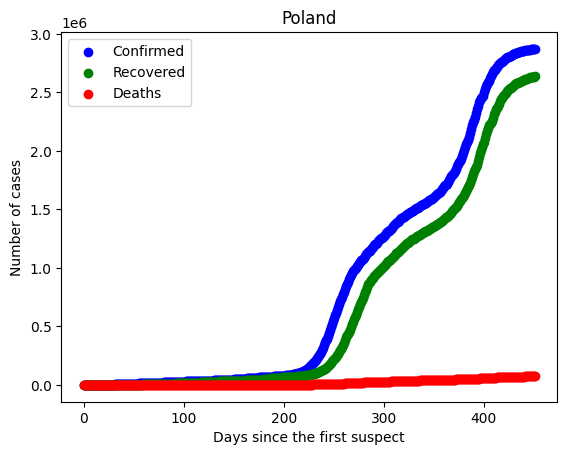

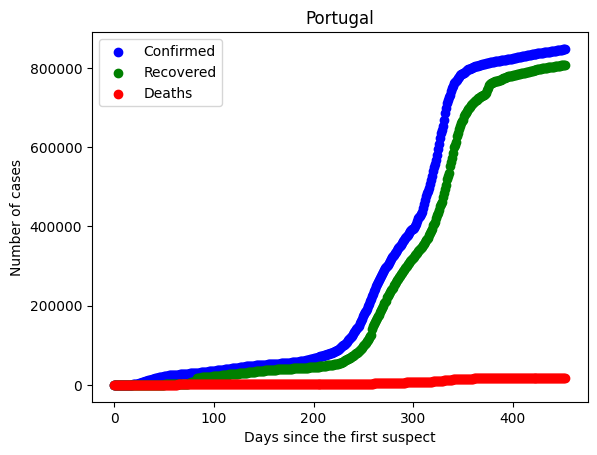

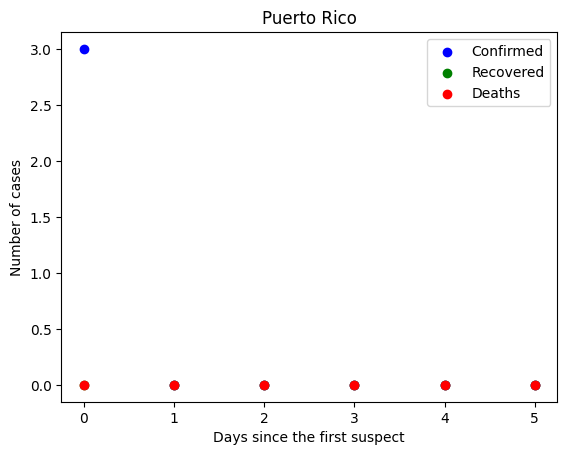

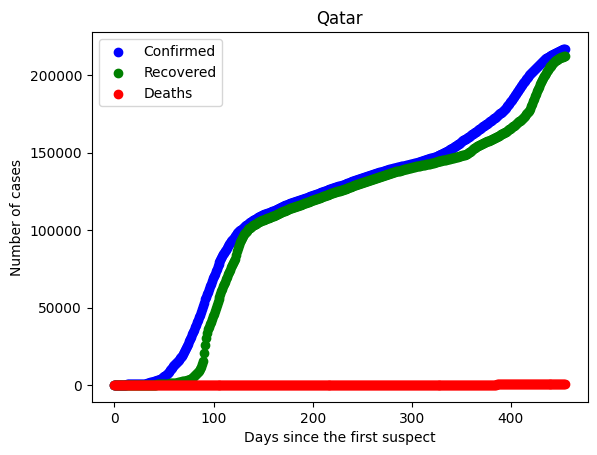

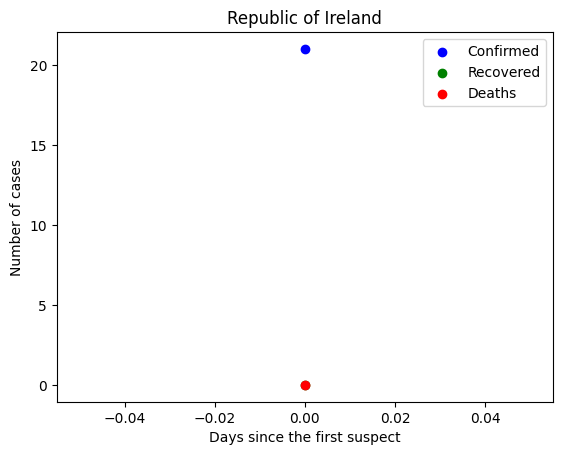

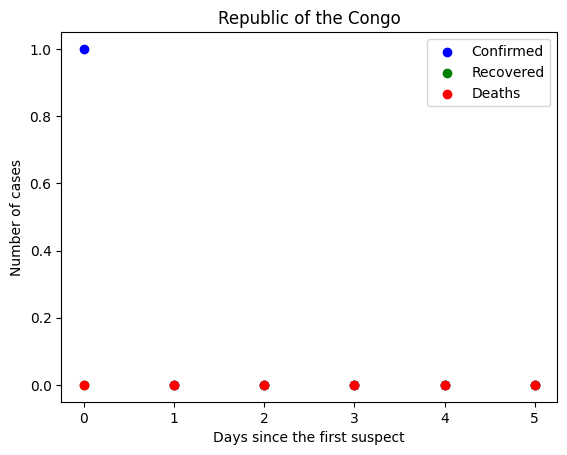

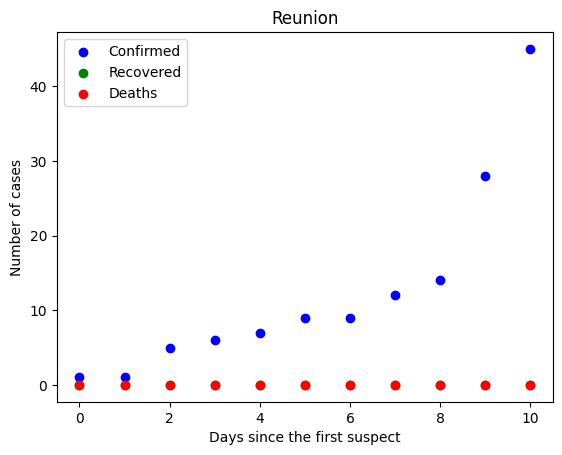

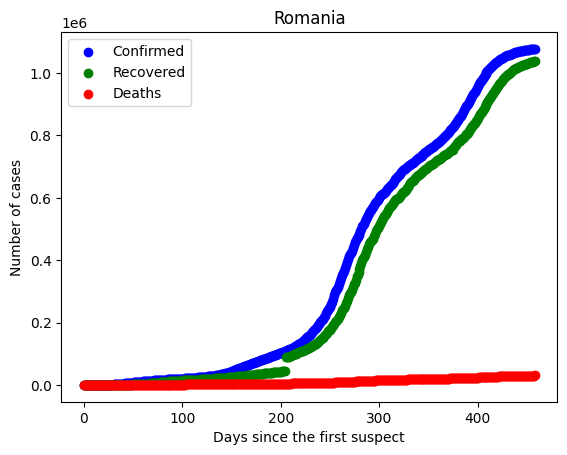

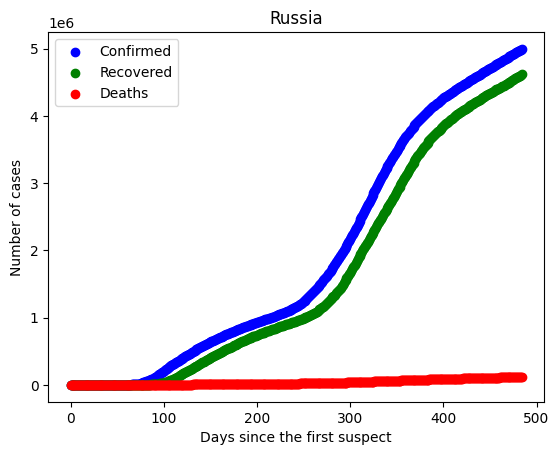

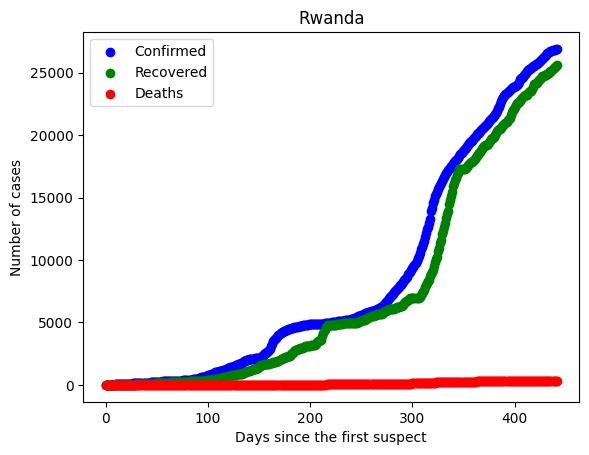

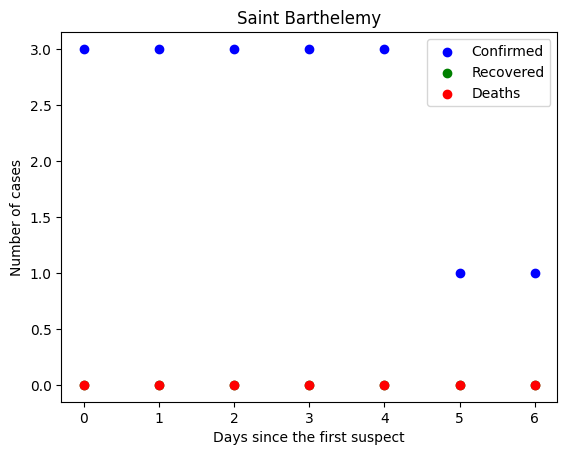

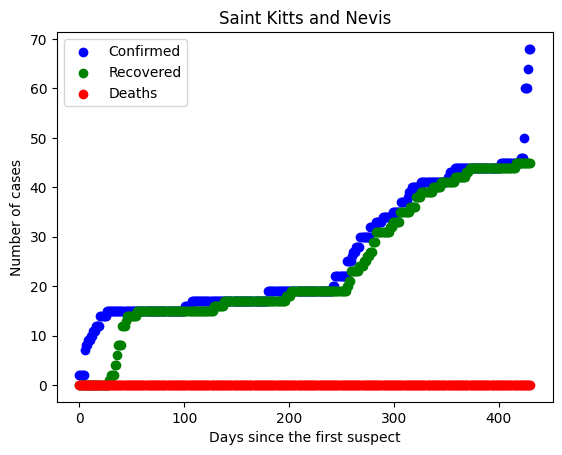

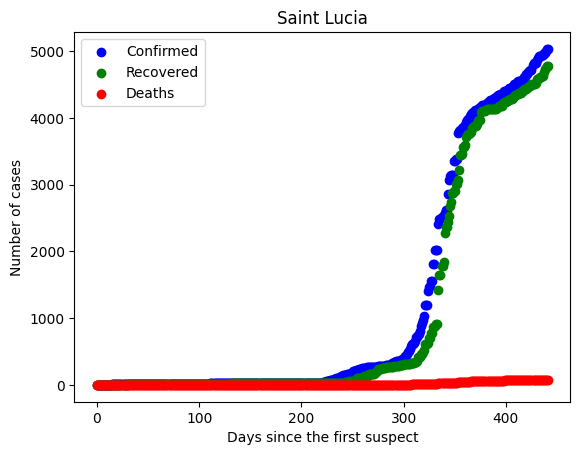

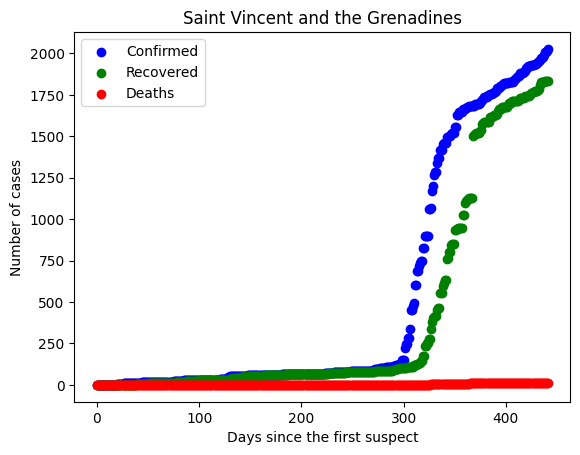

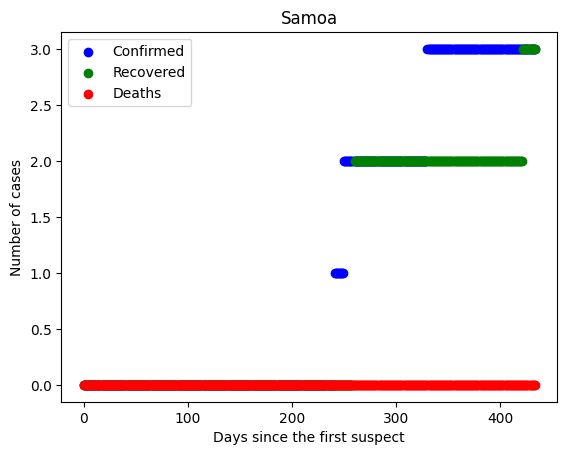

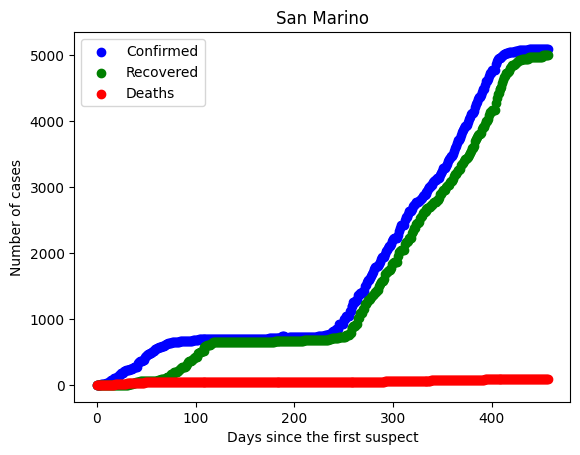

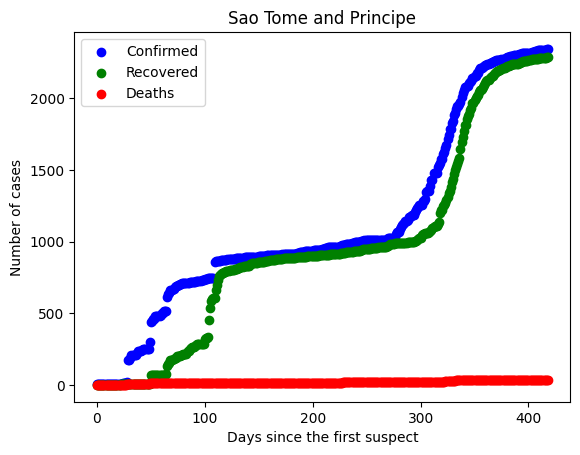

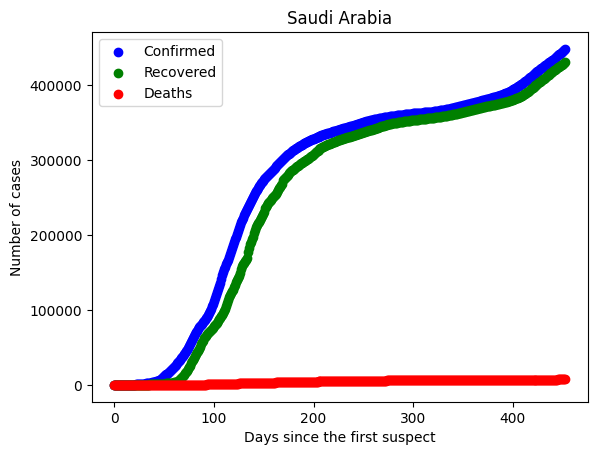

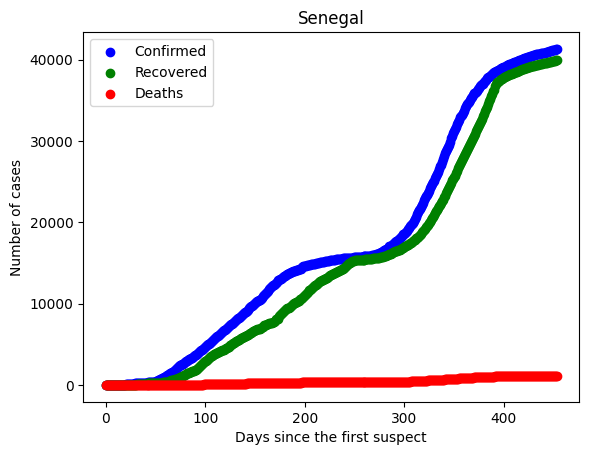

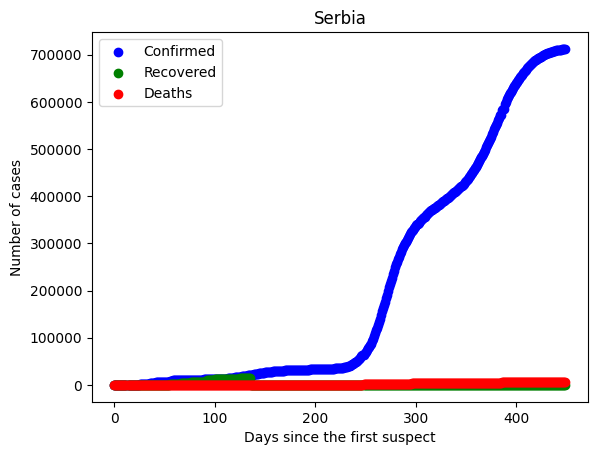

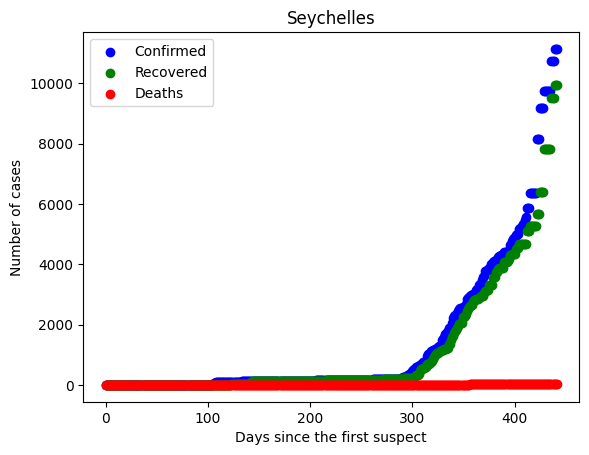

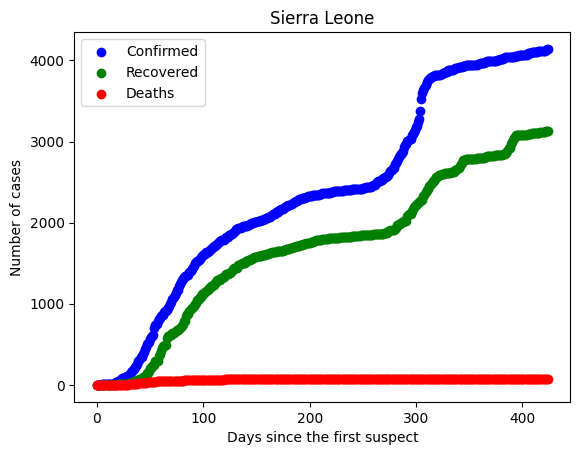

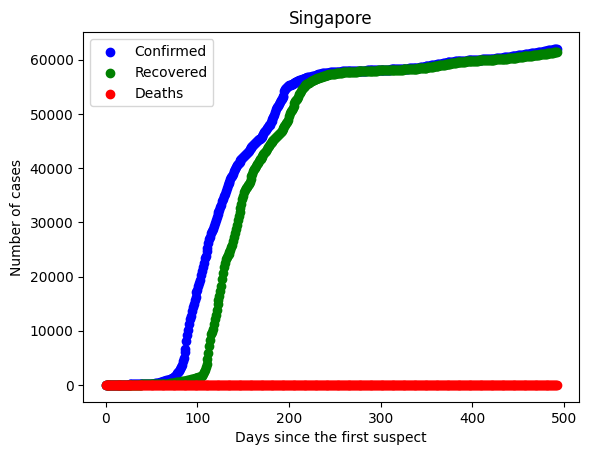

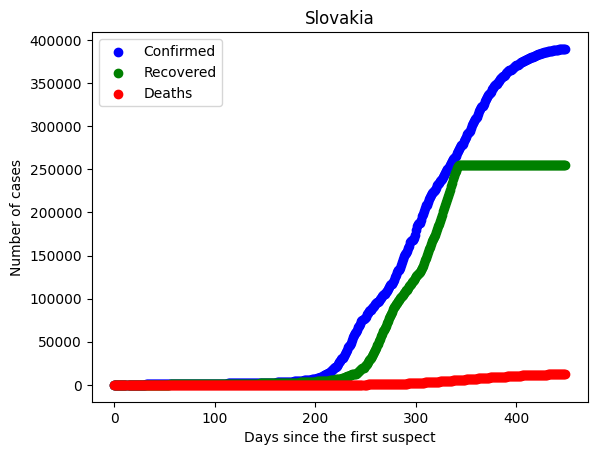

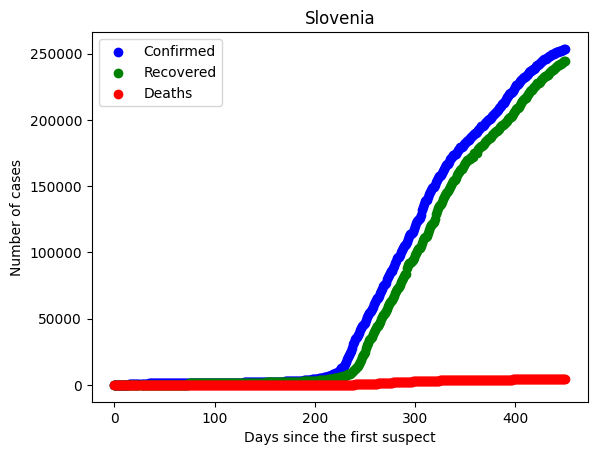

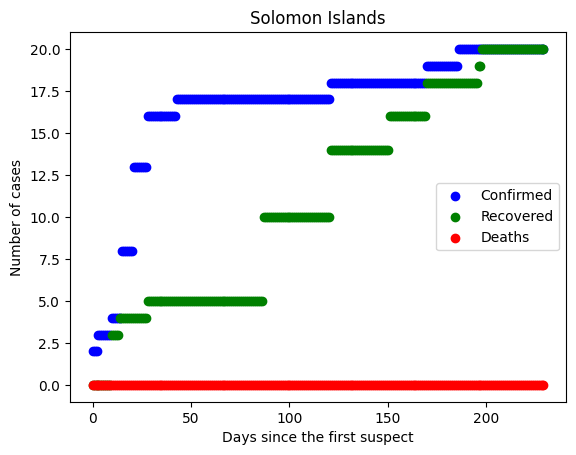

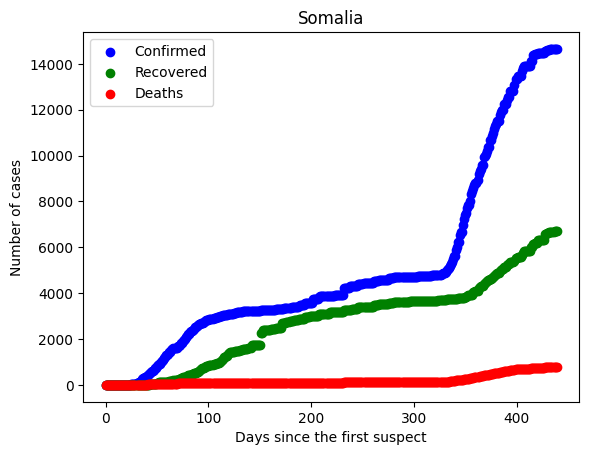

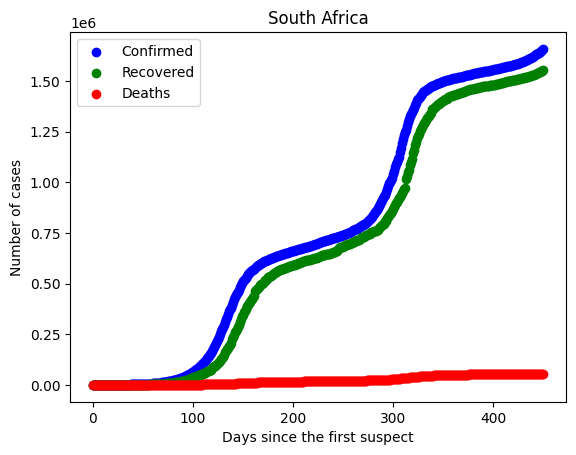

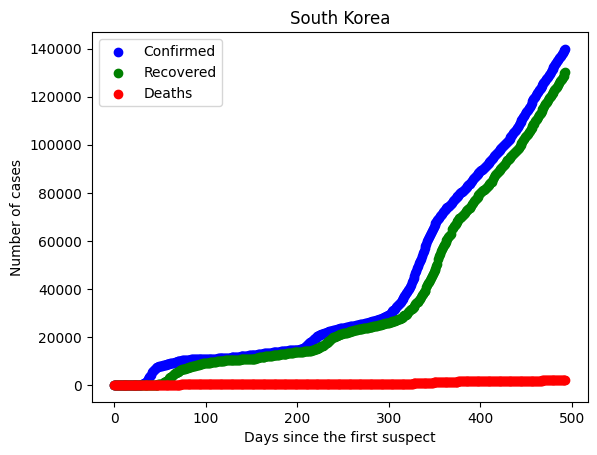

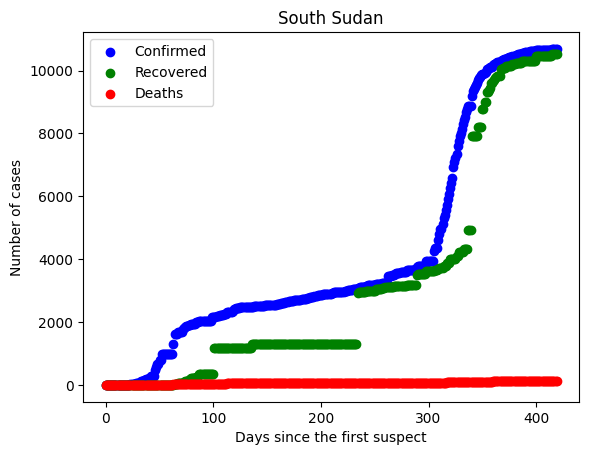

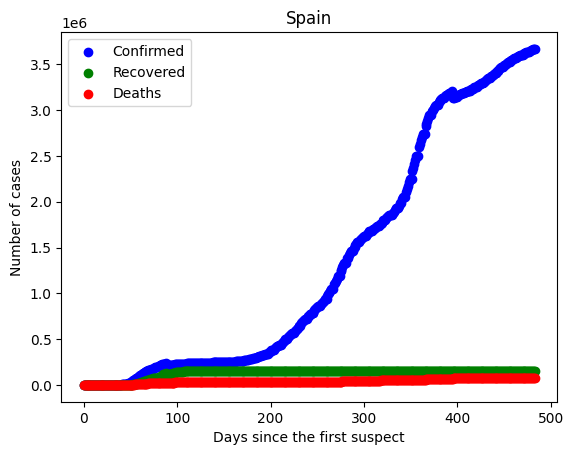

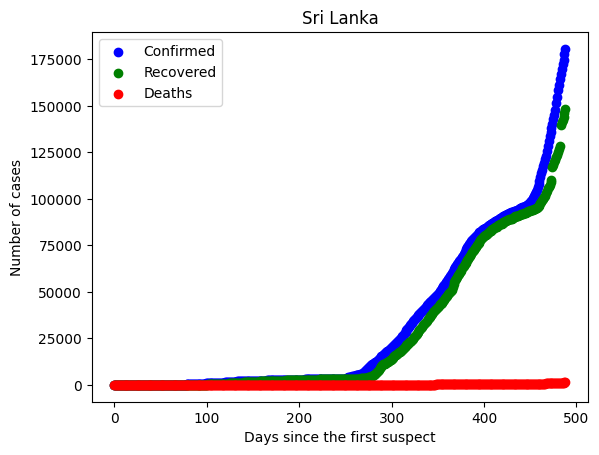

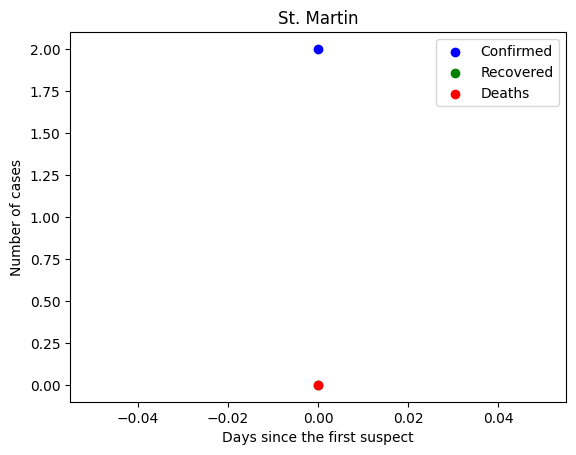

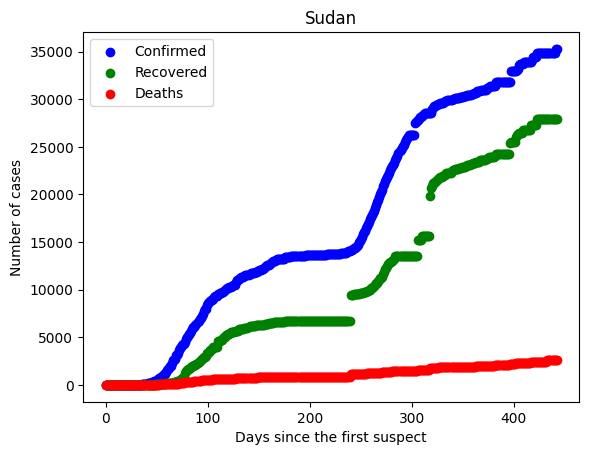

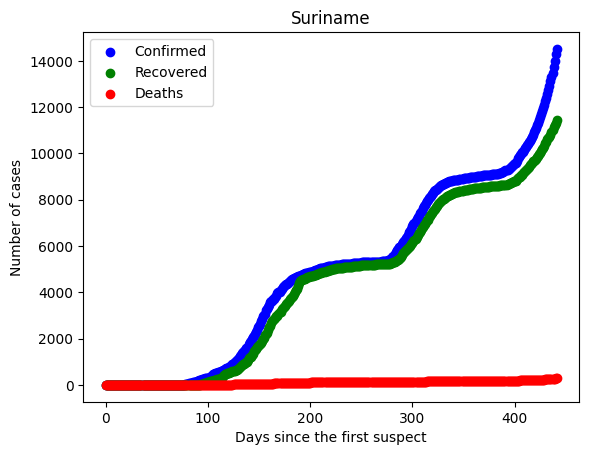

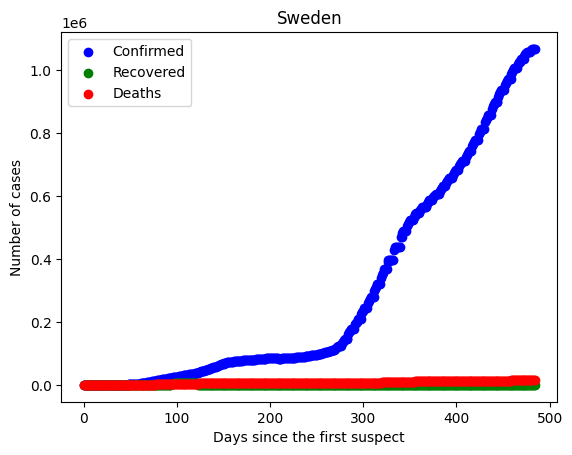

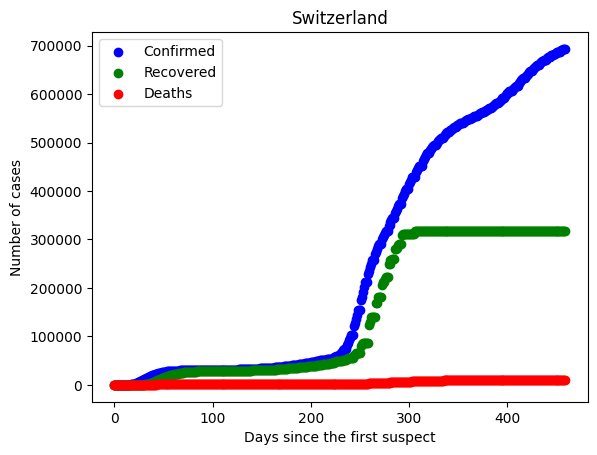

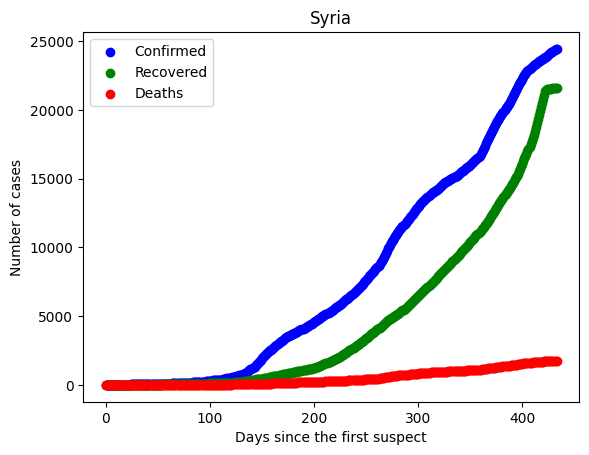

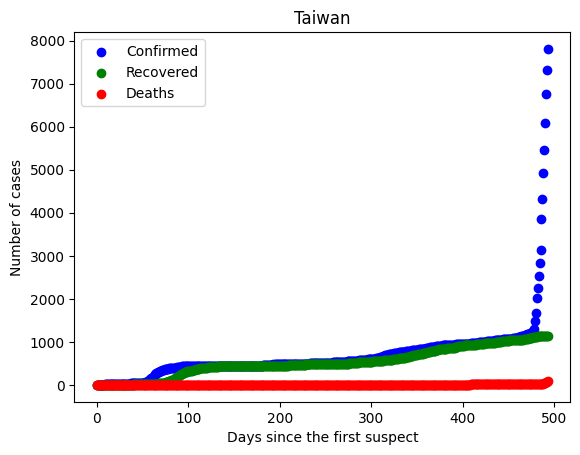

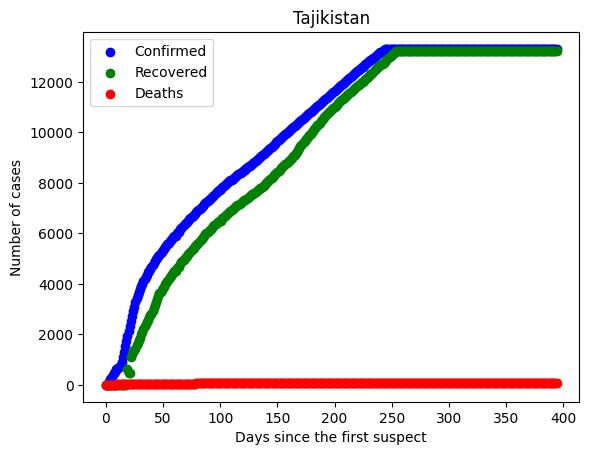

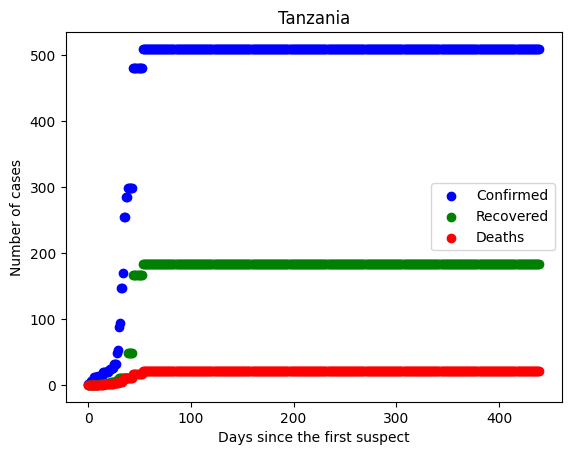

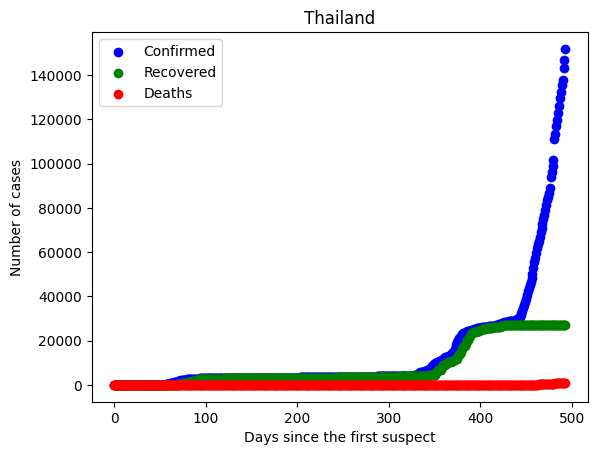

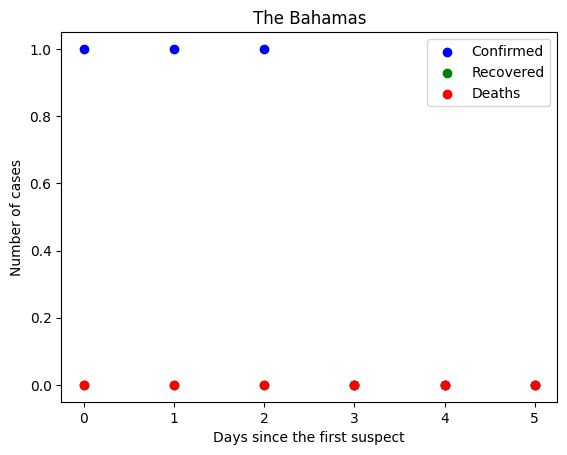

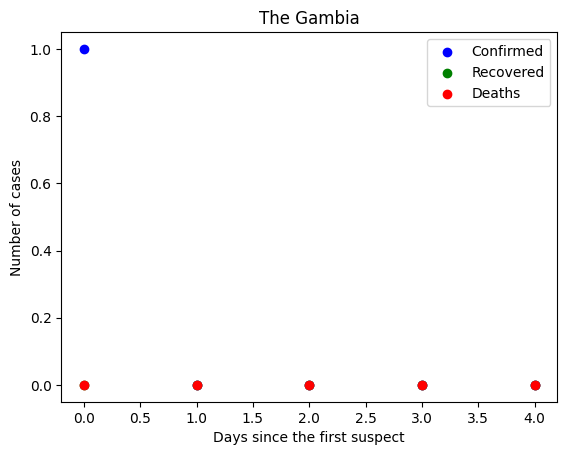

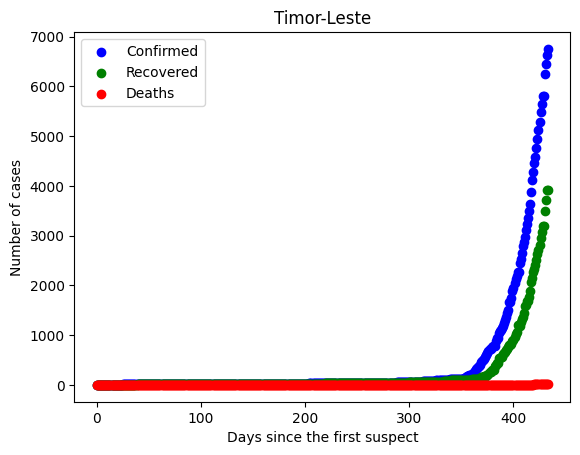

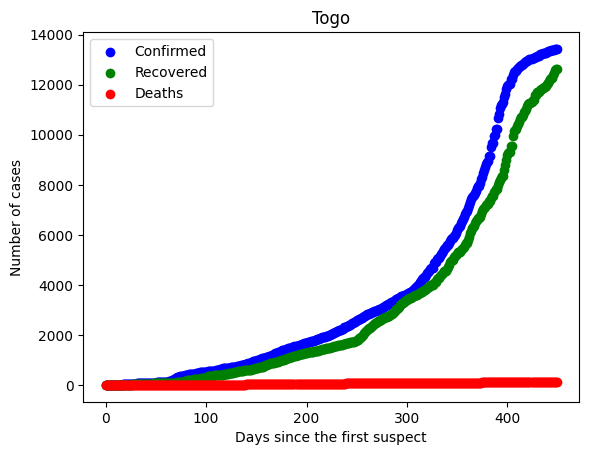

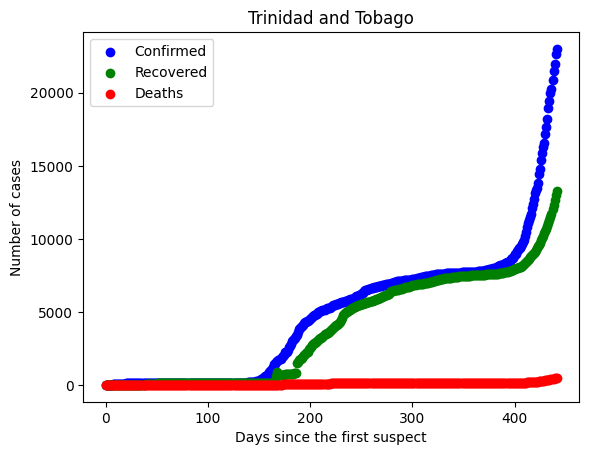

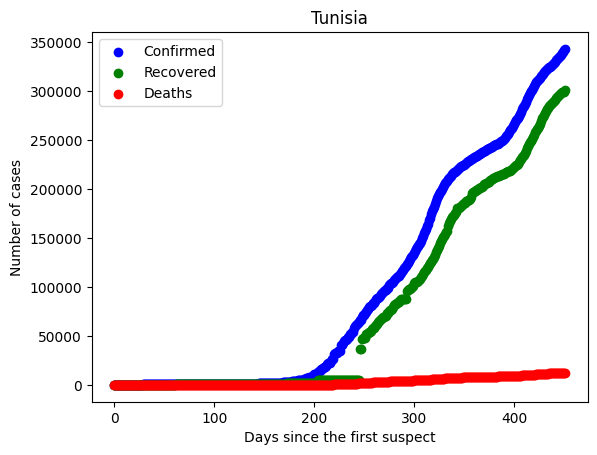

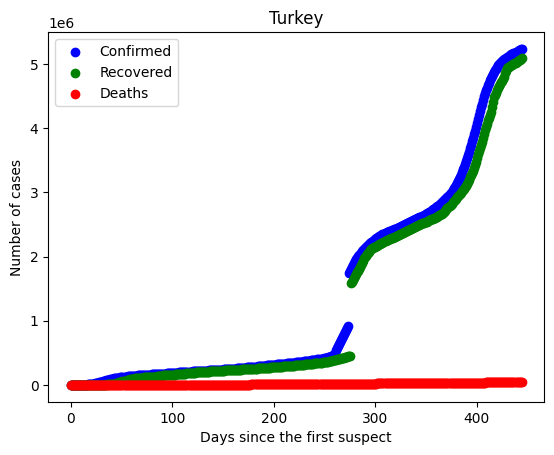

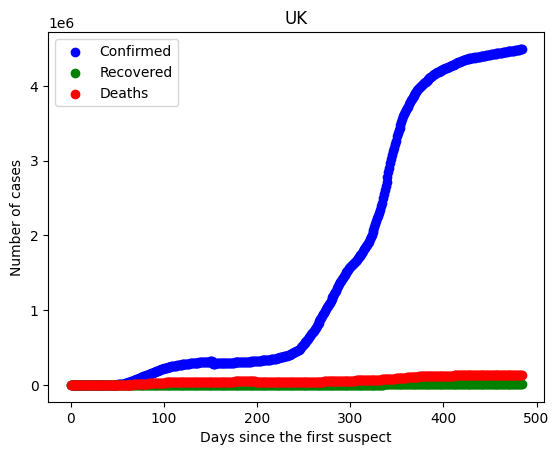

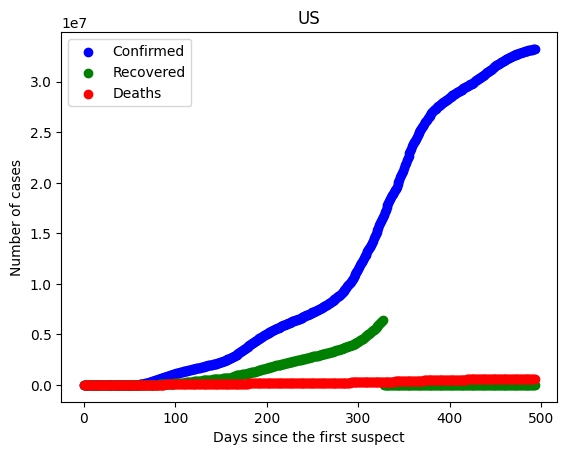

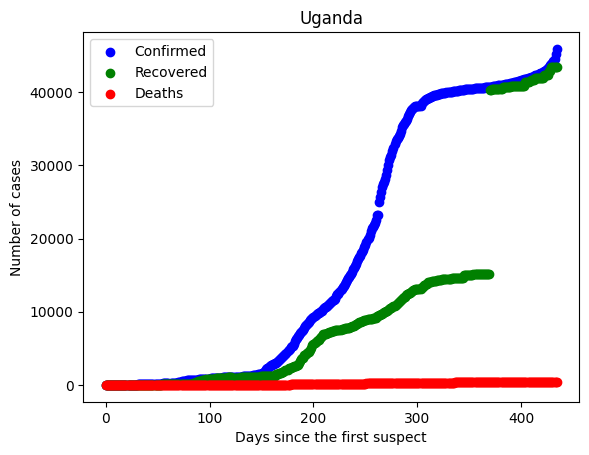

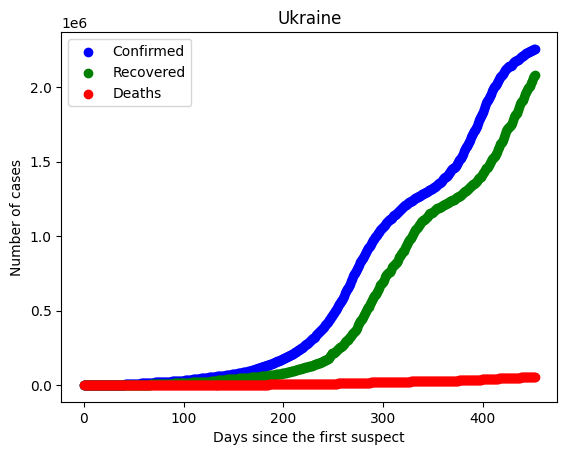

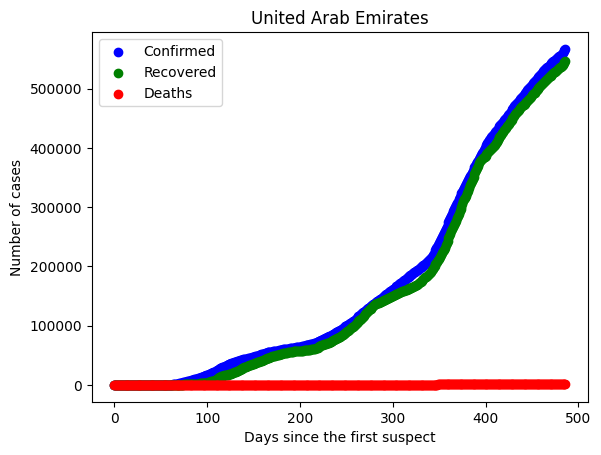

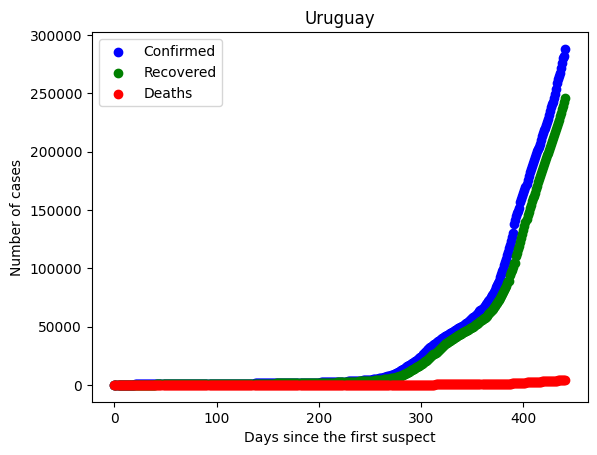

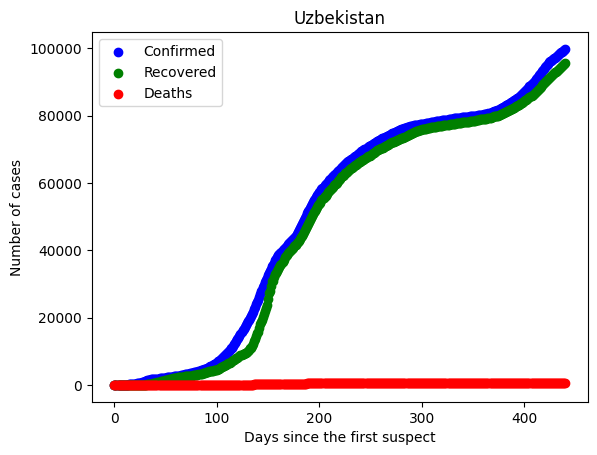

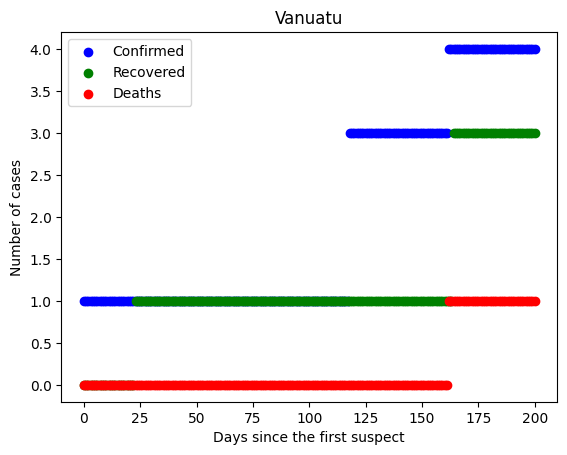

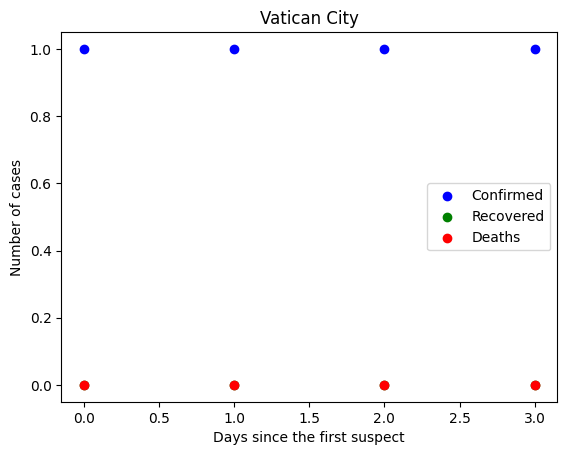

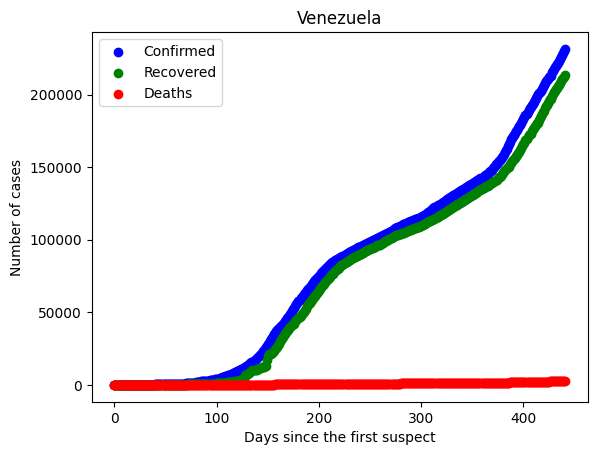

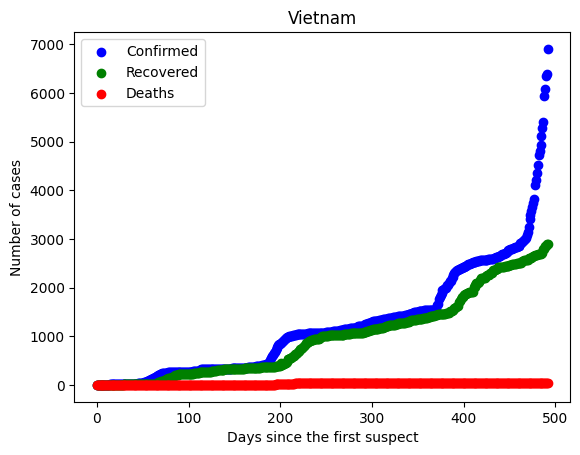

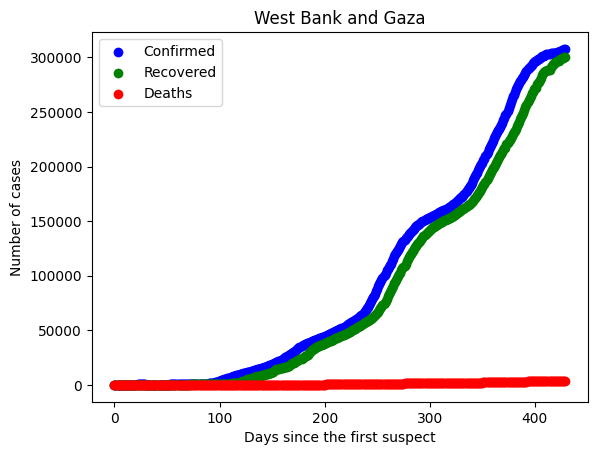

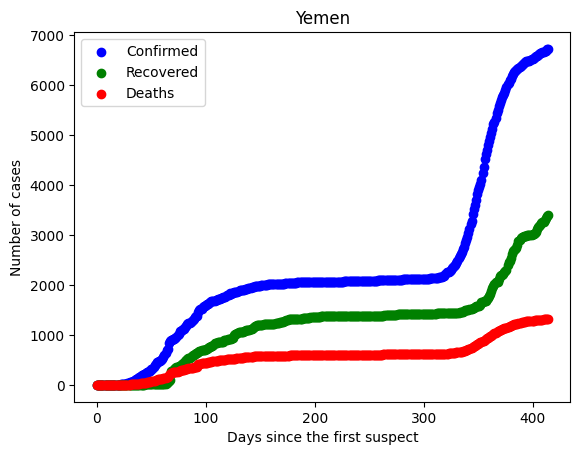

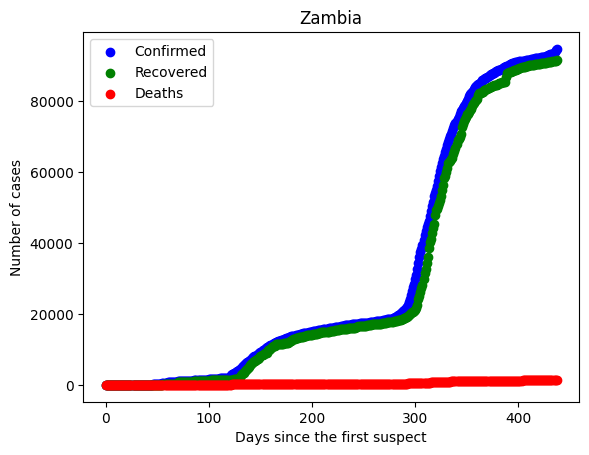

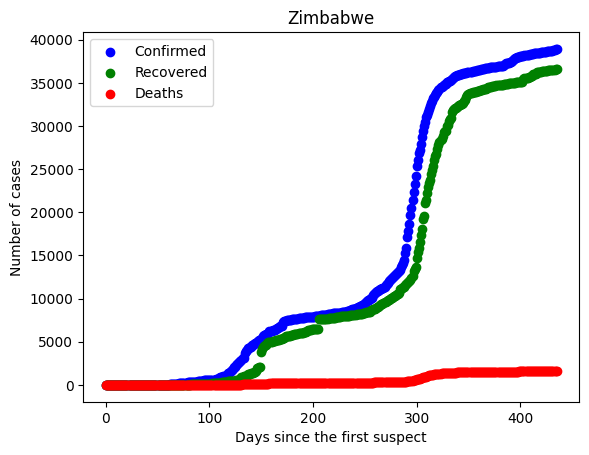

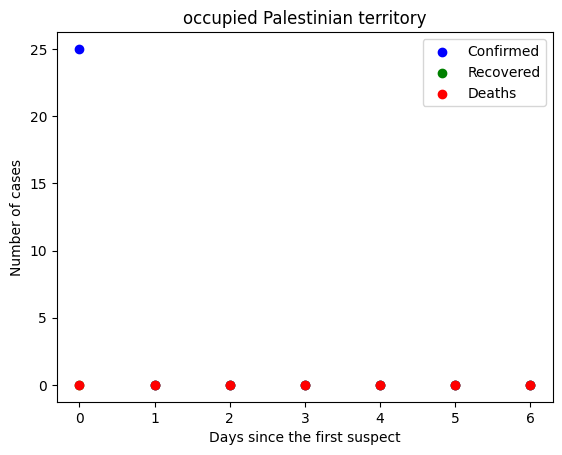

In [13]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()    

In [14]:
df4 = df3.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()


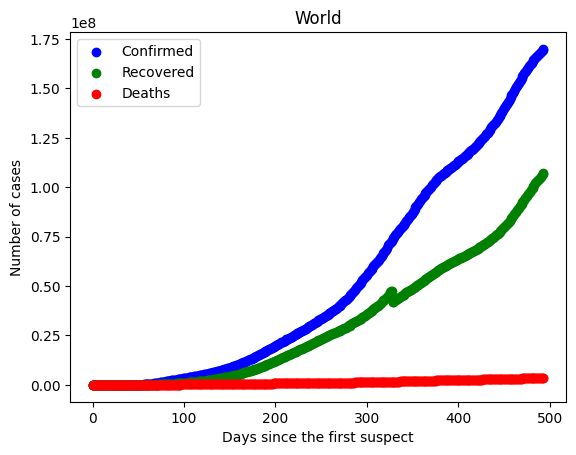

In [15]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()